#### Get the data

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import os
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df_dados = pd.read_json('../../regioes/DataSite/dadosFinais.json')
locationD = pd.read_json('../../regioes/DataSite/localizacao.json', typ='series')
locationD_inverted = {v: k for k, v in locationD.items()}
# locationD_int_keys = {k: v for k, v in locationD.items()}


# dados para website
houseData = pd.read_json('../../regioes/DataSite/housesData.json')
houseData = pd.json_normalize(houseData['houses'])
serietempAno = pd.read_json('../../regioes/DataSite/seriesTempAno.json')

paths = pd.read_json('../../regioes/DataSite/region_paths.json', typ='series') # paths['Cascais']
# locationD_int_keys
df_dados['Date'] = pd.to_datetime(df_dados['Date'], format='%Y%m%d')
df_dados = df_dados.sort_values(by=['Data', 'codLocation'])
df_dados.head()

Avaliacoes Total  Avaliacoes Apartamentos  Avaliacoes Moradias  \
248                430                      305                125.0   
579                489                      403                 86.0   
903                350                      305                 45.0   
1234              1172                     1014                158.0   
1565               434                      421                 13.0   

      Capital Divida Total  Capital Divida 3M  Capital Divida 6M  \
248                  62356             126262             127634   
579                  62356             126262             127634   
903                  62356             126262             127634   
1234                 62356             126262             127634   
1565                 62356             126262             127634   

      Capital Divida 12M  Juros Totais  Capital Amortizado  \
248               125771           114                 201   
579               125771           114                 201   
903               125771           114                 201   
1234              125771           114                 201   
1565              125771           114                 201   

      Unemployed population  ...       Date  moving_avg_price_sell  \
248                   391.2  ... 2023-01-01          780915.333333   
579                   391.2  ... 2023-01-01          316897.333333   
903                   391.2  ... 2023-01-01          447138.333333   
1234                  391.2  ... 2023-01-01          200168.000000   
1565                  391.2  ... 2023-01-01          217517.333333   

      exp_moving_avg_price_sell  price_to_rent_ratio  \
248               780833.000019           356.482664   
579               316940.010083           267.311819   
903               447408.946052           299.476985   
1234              200084.869136           157.493312   
1565              217336.921730           256.921615   

      propriedades_unicas_rent  propriedades_unicas_sell  \
248                        4.0                      -5.0   
579                        2.0                      -9.0   
903                        3.0                       2.0   
1234                       8.0                      45.0   
1565                      11.0                       3.0   

      moving_avg_price_rent  exp_moving_avg_price_rent  \
248             2159.333333                2161.802204   
579             1192.000000                1192.355605   
903             1522.000000                1516.558968   
1234            1275.333333                1270.812194   
1565             843.333333                 843.431244   

      moving_avg_Reducao_sell  moving_avg_Reducao_rent  
248                 15.666667                 6.666667  
579                 11.000000                 0.333333  
903                 14.666667                 0.000000  
1234                22.333333                 0.666667  
1565                13.000000                 0.000000  

[5 rows x 78 columns]

In [13]:
df_dados = df_dados.sort_values(by=['Data', 'codLocation'])

df_dados['codLocation'] = df_dados['codLocation'].astype(str)
df_dados['localizacao'] = df_dados['codLocation'].map(locationD)
unique_locations = df_dados['localizacao'].unique()
# unique_locations
df_dados.Date.unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2020-03-01 00:00:00', '2018-04-01 00:00:00',
 '2022-05-01 00:00:00', '2018-07-01 00:00:00', '2021-08-01 00:00:00',
 '2019-09-01 00:00:00', '2023-10-01 00:00:00', '2020-11-01 00:00:00',
 '2019-12-01 00:00:00',
 ...
 '2018-09-30 00:00:00', '2022-10-30 00:00:00', '2018-12-30 00:00:00',
 '2021-01-31 00:00:00', '2019-03-31 00:00:00', '2024-03-31 00:00:00',
 '2020-05-31 00:00:00', '2022-07-31 00:00:00', '2021-10-31 00:00:00',
 '2023-12-31 00:00:00']
Length: 331, dtype: datetime64[ns]

In [14]:
# Introdução dos dados
print("Introdução dos Dados")
print(f"Período Coberto: {df_dados['Date'].min()} até {df_dados['Date'].max()}")
print(f"Localizações únicas: {len(unique_locations)} regiões")
print(f"Número total de observações: {len(df_dados)}")
print(f"Variáveis disponíveis: {df_dados.columns.tolist()}")

Introdução dos Dados
Período Coberto: 2018-04-01 00:00:00 até 2024-07-28 00:00:00
Localizações únicas: 6 regiões
Número total de observações: 1979
Variáveis disponíveis: ['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias', 'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M', 'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado', 'Unemployed population', 'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano', '1 mês (Euribor)', '3 meses (Euribor)', '6 meses (Euribor)', '12 meses (Euribor)', 'Número de beneficiários de subsídio de desemprego (milhares)-mensal', 'Indicador coincidente para a atividade económica-Mensal-TVH', 'Indicador coincidente para o consumo privado-Mensal-TVH', 'Endividamento dos particulares-TVA', 'Endividamento dos particulares', 'Endividamento dos particulares junto de empresas não financeiras', 'Endividamento dos particulares junto do setor financeiro', 'Endividamento dos particulares junto das administrações públicas', 'Endividamento do

In [15]:
print("\nAmostra dos dados:")
df_dados.head()


Amostra dos dados:


Avaliacoes Total  Avaliacoes Apartamentos  Avaliacoes Moradias  \
248                430                      305                125.0   
579                489                      403                 86.0   
903                350                      305                 45.0   
1234              1172                     1014                158.0   
1565               434                      421                 13.0   

      Capital Divida Total  Capital Divida 3M  Capital Divida 6M  \
248                  62356             126262             127634   
579                  62356             126262             127634   
903                  62356             126262             127634   
1234                 62356             126262             127634   
1565                 62356             126262             127634   

      Capital Divida 12M  Juros Totais  Capital Amortizado  \
248               125771           114                 201   
579               125771           114                 201   
903               125771           114                 201   
1234              125771           114                 201   
1565              125771           114                 201   

      Unemployed population  ...  moving_avg_price_sell  \
248                   391.2  ...          780915.333333   
579                   391.2  ...          316897.333333   
903                   391.2  ...          447138.333333   
1234                  391.2  ...          200168.000000   
1565                  391.2  ...          217517.333333   

      exp_moving_avg_price_sell  price_to_rent_ratio  \
248               780833.000019           356.482664   
579               316940.010083           267.311819   
903               447408.946052           299.476985   
1234              200084.869136           157.493312   
1565              217336.921730           256.921615   

      propriedades_unicas_rent  propriedades_unicas_sell  \
248                        4.0                      -5.0   
579                        2.0                      -9.0   
903                        3.0                       2.0   
1234                       8.0                      45.0   
1565                      11.0                       3.0   

      moving_avg_price_rent  exp_moving_avg_price_rent  \
248             2159.333333                2161.802204   
579             1192.000000                1192.355605   
903             1522.000000                1516.558968   
1234            1275.333333                1270.812194   
1565             843.333333                 843.431244   

      moving_avg_Reducao_sell  moving_avg_Reducao_rent  localizacao  
248                 15.666667                 6.666667      Cascais  
579                 11.000000                 0.333333       Loures  
903                 14.666667                 0.000000       Oeiras  
1234                22.333333                 0.666667       Sintra  
1565                13.000000                 0.000000      Amadora  

[5 rows x 79 columns]

In [16]:
df_dados.columns

Index(['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
       'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado',
       'Unemployed population', 'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano',
       '1 mês (Euribor)', '3 meses (Euribor)', '6 meses (Euribor)',
       '12 meses (Euribor)',
       'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
       'Indicador coincidente para a atividade económica-Mensal-TVH',
       'Indicador coincidente para o consumo privado-Mensal-TVH',
       'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
       'Endividamento dos particulares junto de empresas não financeiras',
       'Endividamento dos particulares junto do setor financeiro',
       'Endividamento dos particulares junto das administrações públicas',
       'Endividamento dos particulares junto de particulares',
       'Endividamento dos particul

In [17]:
# 1. Imóveis (Venda e Aluguel)
imoveis = [
    "Preço médio_sell", "Preço médio por m2_sell", "Preço médio de fechamento (BETA)_sell", 
    "Preço médio de fechamento por m2 (BETA)_sell", "Subida de preço_sell", "Redução de preço_sell", 
    "Novas propriedades únicas_sell", "Propriedades vendida e retiradas_sell", 
    "Novas listagens não desduplicadas_sell", "Preço médio_rent", "Preço médio por m2_rent", 
    "Preço médio de fechamento (BETA)_rent", "Preço médio de fechamento por m2 (BETA)_rent", 
    "Subida de preço_rent", "Redução de preço_rent", "Novas propriedades únicas_rent", 
    "Propriedades vendida e retiradas_rent", "Novas listagens não desduplicadas_rent", 
    "price_to_rent_ratio"
]

# 2. Indicadores de Endividamento e Juros
endividamento_juros = [
    "Endividamento dos particulares", "Endividamento dos particulares junto do setor financeiro", 
    "Endividamento dos particulares junto de empresas não financeiras", 
    "Endividamento dos particulares junto das administrações públicas", 
    "Endividamento dos particulares junto de particulares", 
    "Endividamento dos particulares junto do resto do mundo", 
    "TAEG de novos empréstimos à habitação", "TAEG de novos empréstimos ao consumo", 
    "Taxa de juro (TAA) de novos empréstimos à habitação", 
    "Taxa de juro (TAA) de novos empréstimos ao consumo", 
    "Taxa de juro (TAA) de novos empréstimos às empresas não financeiras", 
    "Capital Divida Total", "Capital Divida 3M", "Capital Divida 6M", "Capital Divida 12M", 
    "Juros Totais", "Capital Amortizado"
]

# 3. Indicadores Macroeconômicos e Desemprego
indicadores_macroeconomicos_desemprego = [
    "Unemployed population", "Número de beneficiários de subsídio de desemprego (milhares)-mensal", 
    "Desemprego registado no final do período-Total-Mensal", 
    "Desemprego registado ao longo do período-Total-Mensal", 
    "Indicador coincidente para a atividade económica-Mensal-TVH", 
    "Indicador coincidente para o consumo privado-Mensal-TVH", 
    "IPC total-taxa de variação homóloga", "IPC total-taxa de variação em cadeia", 
    "IPC total (taxa de inflação média anual)-TVMM12"
]

# 4. Tempo e Data
tempo_data = [
    "Data", "Ano", "Mês", "dia", "1 mês (Euribor)", "3 meses (Euribor)", 
    "6 meses (Euribor)", "12 meses (Euribor)", "Dayi", "Monthi", "Yeari",
    "moving_avg_price_sell", "exp_moving_avg_price_sell", "moving_avg_Reducao_sell", 
    "moving_avg_price_rent", "exp_moving_avg_price_rent", "moving_avg_Reducao_rent"
]




In [18]:
# Exibir as primeiras linhas do DataFrame com as colunas de imóveis
df_dados[tempo_data].head().T

248           579           903   \
Data                       1.012023e+06  1.012023e+06  1.012023e+06   
Ano                        2.023000e+03  2.023000e+03  2.023000e+03   
Mês                        1.000000e+00  1.000000e+00  1.000000e+00   
dia                        3.100000e+01  3.100000e+01  3.100000e+01   
1 mês (Euribor)            1.981000e+00  1.981000e+00  1.981000e+00   
3 meses (Euribor)          2.345000e+00  2.345000e+00  2.345000e+00   
6 meses (Euribor)          2.858000e+00  2.858000e+00  2.858000e+00   
12 meses (Euribor)         3.337000e+00  3.337000e+00  3.337000e+00   
Dayi                       1.000000e+00  1.000000e+00  1.000000e+00   
Monthi                     1.000000e+00  1.000000e+00  1.000000e+00   
Yeari                      2.023000e+03  2.023000e+03  2.023000e+03   
moving_avg_price_sell      7.809153e+05  3.168973e+05  4.471383e+05   
exp_moving_avg_price_sell  7.808330e+05  3.169400e+05  4.474089e+05   
moving_avg_Reducao_sell    1.566667e+01  1.100000e+01  1.466667e+01   
moving_avg_price_rent      2.159333e+03  1.192000e+03  1.522000e+03   
exp_moving_avg_price_rent  2.161802e+03  1.192356e+03  1.516559e+03   
moving_avg_Reducao_rent    6.666667e+00  3.333333e-01  0.000000e+00   

                                   1234          1565  
Data                       1.012023e+06  1.012023e+06  
Ano                        2.023000e+03  2.023000e+03  
Mês                        1.000000e+00  1.000000e+00  
dia                        3.100000e+01  3.100000e+01  
1 mês (Euribor)            1.981000e+00  1.981000e+00  
3 meses (Euribor)          2.345000e+00  2.345000e+00  
6 meses (Euribor)          2.858000e+00  2.858000e+00  
12 meses (Euribor)         3.337000e+00  3.337000e+00  
Dayi                       1.000000e+00  1.000000e+00  
Monthi                     1.000000e+00  1.000000e+00  
Yeari                      2.023000e+03  2.023000e+03  
moving_avg_price_sell      2.001680e+05  2.175173e+05  
exp_moving_avg_price_sell  2.000849e+05  2.173369e+05  
moving_avg_Reducao_sell    2.233333e+01  1.300000e+01  
moving_avg_price_rent      1.275333e+03  8.433333e+02  
exp_moving_avg_price_rent  1.270812e+03  8.434312e+02  
moving_avg_Reducao_rent    6.666667e-01  0.000000e+00

In [19]:
# Mostrar as primeiras linhas do DataFrame para uma visão geral
print("\nAmostra dos dados:")
print(df_dados.head())

# Análise descritiva das variáveis numéricas
print("\nAnálise Descritiva das Variáveis Numéricas:")
print(df_dados.describe())

# Análise do número de observações e tipos de variáveis
print("\nNúmero de Observações e Tipos de Variáveis:")
print(df_dados.info())


Amostra dos dados:
      Avaliacoes Total  Avaliacoes Apartamentos  Avaliacoes Moradias  \
248                430                      305                125.0   
579                489                      403                 86.0   
903                350                      305                 45.0   
1234              1172                     1014                158.0   
1565               434                      421                 13.0   

      Capital Divida Total  Capital Divida 3M  Capital Divida 6M  \
248                  62356             126262             127634   
579                  62356             126262             127634   
903                  62356             126262             127634   
1234                 62356             126262             127634   
1565                 62356             126262             127634   

      Capital Divida 12M  Juros Totais  Capital Amortizado  \
248               125771           114                 201   
579           

### Exploração de Dados (EDA - Análise Exploratória de Dados)

##### Análise Descritiva 

In [15]:
estatisticas_preco = df_dados[['Preço médio_sell', 'Preço médio_rent', 'Subida de preço_sell', 'Redução de preço_sell']].describe()
estatisticas_preco

Preço médio_sell  Preço médio_rent  Subida de preço_sell  \
count       1979.000000       1979.000000           1979.000000   
mean      327577.397676       1264.034613             12.192016   
std       174888.643953        420.035638              7.953655   
min       131948.000000        641.000000              0.000000   
25%       207902.500000        955.000000              7.000000   
50%       246282.000000       1185.000000             11.000000   
75%       421436.000000       1463.000000             16.000000   
max       884466.000000       2615.000000             66.000000   

       Redução de preço_sell  
count            1979.000000  
mean               24.458565  
std                16.482067  
min                 0.000000  
25%                13.000000  
50%                21.000000  
75%                31.000000  
max               150.000000

In [16]:
# Estatísticas descritivas para o desemprego e endividamento
estatisticas_desemprego_endividamento = df_dados[['Unemployed population', 
                                                  'Endividamento dos particulares', 
                                                  'Endividamento dos particulares junto do setor financeiro']].describe()
estatisticas_desemprego_endividamento


Unemployed population  Endividamento dos particulares  \
count            1979.000000                     1979.000000   
mean              343.628499                   145093.604757   
std                26.776635                     5001.570069   
min               278.400000                   138614.140000   
25%               326.000000                   140254.360000   
50%               342.800000                   143860.220000   
75%               359.900000                   150703.300000   
max               415.200000                   152544.710000   

       Endividamento dos particulares junto do setor financeiro  
count                                        1979.000000         
mean                                       130805.301089         
std                                          4717.767250         
min                                        124930.800000         
25%                                        125873.620000         
50%                                        129774.330000         
75%                                        135998.180000         
max                                        137485.210000

In [17]:
estatisticas_taxas = df_dados[['TAEG de novos empréstimos à habitação', 'Taxa de juro (TAA) de novos empréstimos ao consumo', 
                               'Taxa de juro (TAA) do stock de empréstimos às empresas não financeiras']].describe()
estatisticas_taxas

TAEG de novos empréstimos à habitação  \
count                            1979.000000   
mean                                3.433219   
std                                 1.531313   
min                                 2.140000   
25%                                 2.370000   
50%                                 2.450000   
75%                                 4.820000   
max                                 6.330000   

       Taxa de juro (TAA) de novos empréstimos ao consumo  \
count                                        1979.000000    
mean                                            7.865407    
std                                             0.785504    
min                                             6.750000    
25%                                             7.240000    
50%                                             7.710000    
75%                                             8.430000    
max                                             9.630000    

       Taxa de juro (TAA) do stock de empréstimos às empresas não financeiras  
count                                        1979.000000                       
mean                                            3.013259                       
std                                             1.307753                       
min                                             2.030000                       
25%                                             2.120000                       
50%                                             2.390000                       
75%                                             3.750000                       
max                                             5.680000

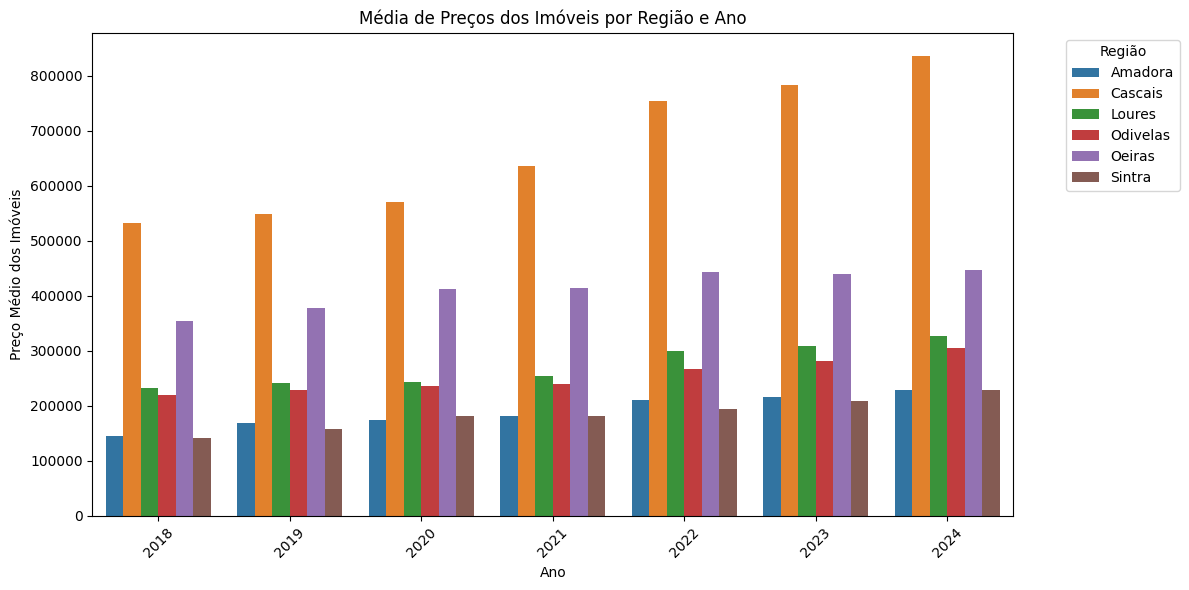

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a média de preços dos imóveis por região e ano
preco_medio = df_dados.groupby(['localizacao', 'Ano'])['Preço médio_sell'].mean().reset_index()

# Gráfico de barras da média de preços por região e ano
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano', y='Preço médio_sell', hue='localizacao', data=preco_medio)
plt.title('Média de Preços dos Imóveis por Região e Ano')
plt.xlabel('Ano')
plt.ylabel('Preço Médio dos Imóveis')
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

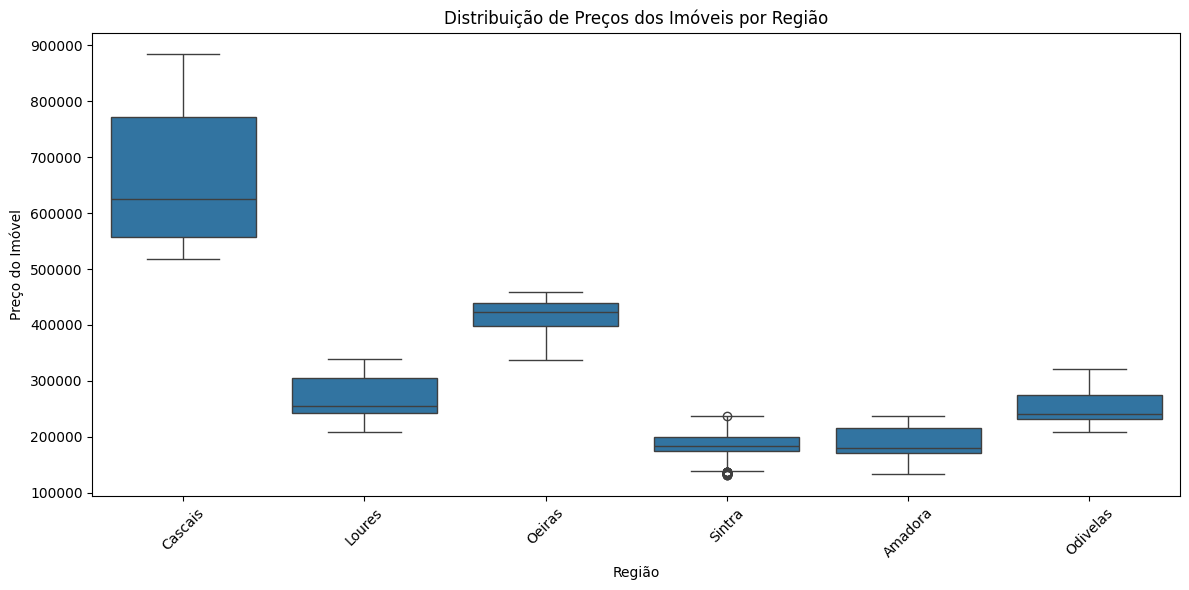

In [19]:
# Boxplot da distribuição de preços de imóveis por região
plt.figure(figsize=(12, 6))
sns.boxplot(x='localizacao', y='Preço médio_sell', data=df_dados)
plt.title('Distribuição de Preços dos Imóveis por Região')
plt.xlabel('Região')
plt.ylabel('Preço do Imóvel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

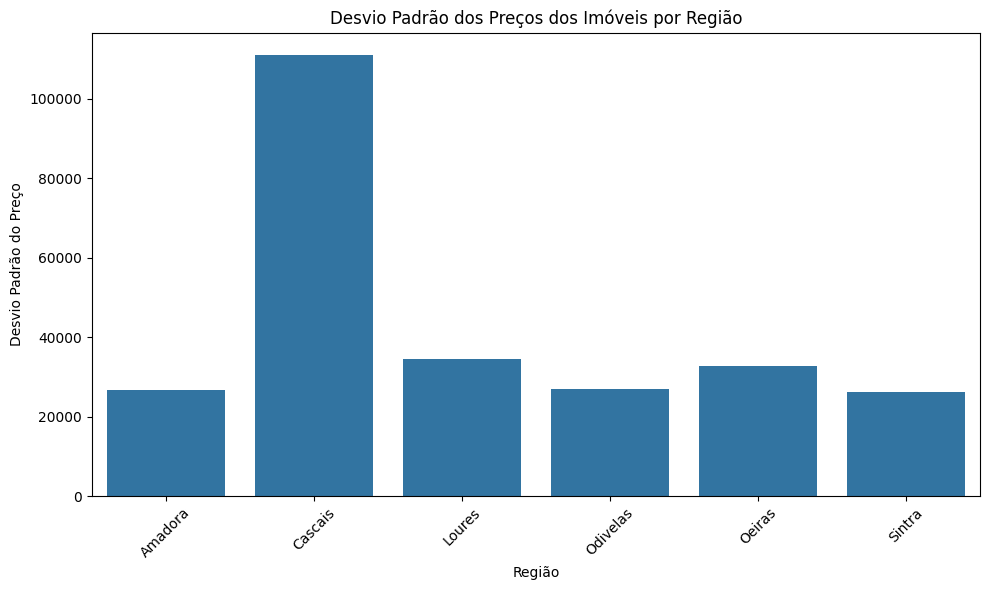

In [20]:
desvio_padrao = df_dados.groupby('localizacao')['Preço médio_sell'].std().reset_index()

# Gráfico de barras do desvio padrão dos preços por região
plt.figure(figsize=(10, 6))
sns.barplot(x='localizacao', y='Preço médio_sell', data=desvio_padrao)
plt.title('Desvio Padrão dos Preços dos Imóveis por Região')
plt.xlabel('Região')
plt.ylabel('Desvio Padrão do Preço')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### Distribuição dos Dados

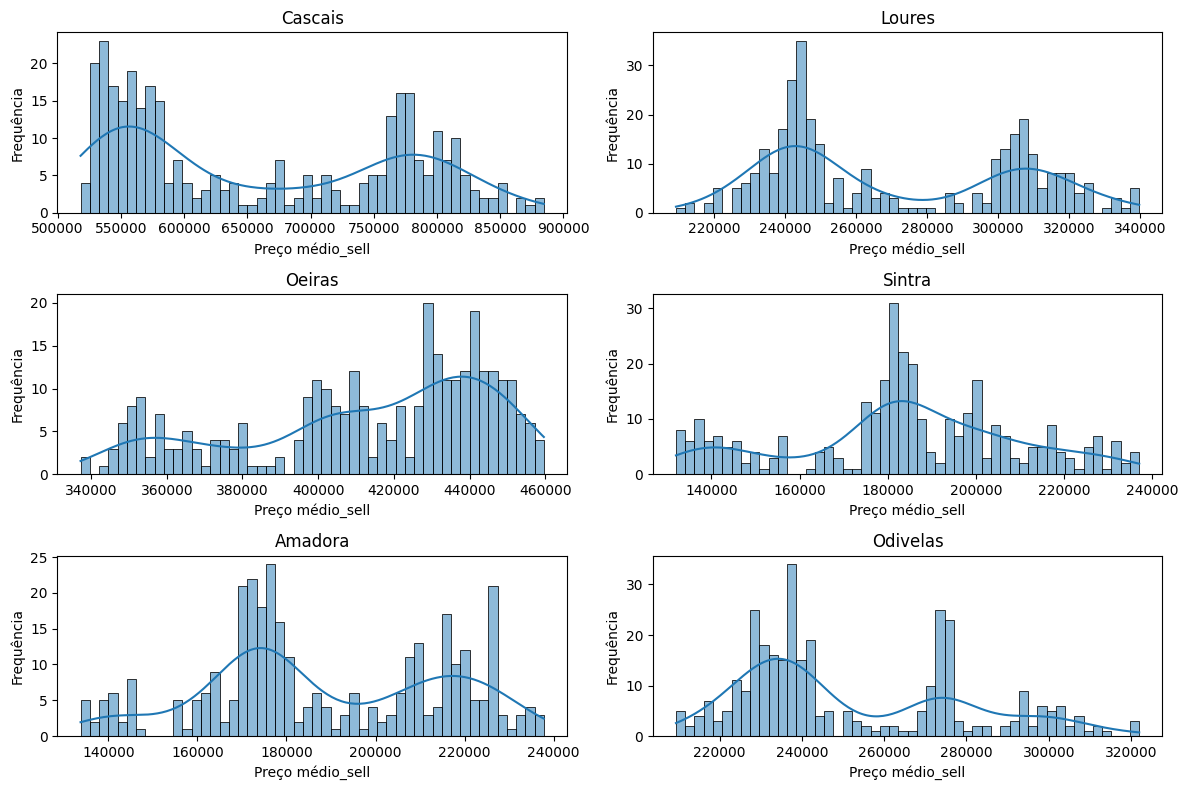

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

localizacoes = df_dados['localizacao'].unique()

fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten() 

variavel = 'Preço médio_sell'

x_min = df_dados[variavel].min()
x_max = df_dados[variavel].max()


for i, localizacao in enumerate(localizacoes):
    dados_localizacao = df_dados[df_dados['localizacao'] == localizacao]

    
    sns.histplot(dados_localizacao[variavel], bins=50, kde=True, ax=axes[i])
    
    # axes[i].set_xlim(x_min, x_max)
    axes[i].set_title(f'{localizacao}')
    axes[i].set_xlabel(variavel)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()




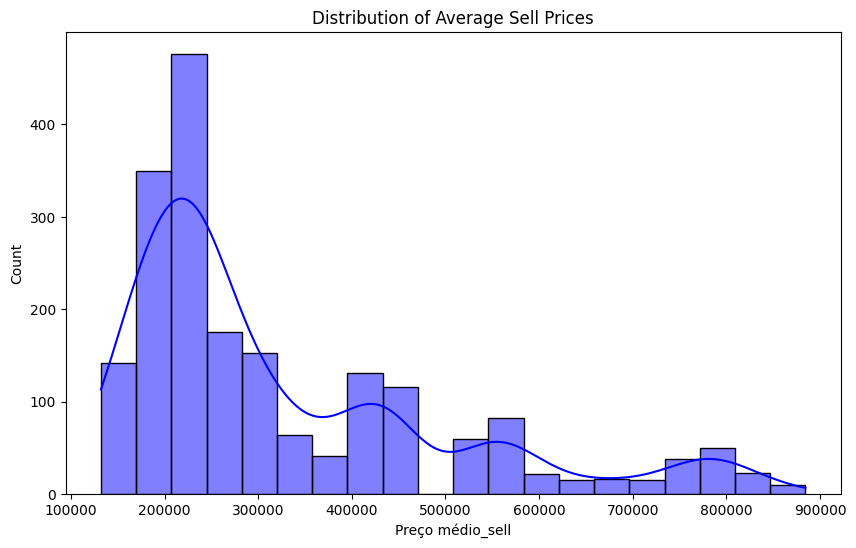

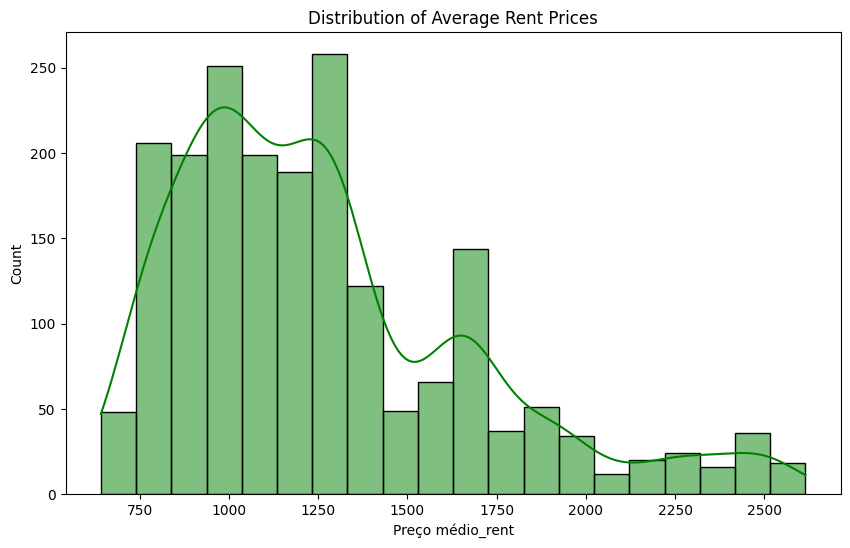

In [22]:
# Geral analise de todos os dados
# Distribution of Sell and Rent Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_dados['Preço médio_sell'], bins=20, color='blue', kde=True)
plt.title('Distribution of Average Sell Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_dados['Preço médio_rent'], bins=20, color='green', kde=True)
plt.title('Distribution of Average Rent Prices')
plt.show()

##### Séries Temporais

In [23]:
import plotly.express as px
import pandas as pd

df_dados['Date'] = pd.to_datetime(df_dados['Date'], format='%Y%m%d')
df_dados = df_dados.sort_values(by=['Date', 'codLocation'])

# variaveis_disponiveis = ['Subida de preço_sell', 'Redução de preço_sell', 'Preço médio_sell', 'Preço médio_rent']

local = "Cascais"

def criar_grafico(localizacao, variaveis):
    df_local = df_dados[df_dados['localizacao'] == localizacao]

    fig = px.line(df_local, x='Date', y=variaveis,
                  title=f'Evolução das Variáveis em {localizacao}',
                  labels={'value': 'Valor', 'variable': 'Variável Selecionada'},
                  markers=True)
    
    fig.update_layout(
        xaxis_title='Data',
        yaxis_title='Valor',
        legend_title='Variável',
        hovermode='x unified',
        template='plotly_dark',  # Tema escuro
        title={
            'text': f'Evolução das Variáveis em {localizacao}',
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 22, 'color': 'white'}
        },
        font=dict(family="Arial, sans-serif", size=12, color="white"),
        # plot_bgcolor='rgba(0,0,0,0)',  # Remove o fundo cinza padrão
        # paper_bgcolor='rgba(0,0,0,0)',  # Remove o fundo cinza ao redor
        legend=dict(
            x=0.02, y=0.98,
            traceorder="normal",
            bgcolor="rgba(0,0,0,0.6)",
            bordercolor="rgba(255,255,255,0.6)",
            borderwidth=1
        ),
        height=800  
    )

    fig.update_traces(
        line=dict(width=2),  
        marker=dict(size=8, symbol='circle-open'), 
        mode='lines+markers'
    )

    fig.show()

variaveis_selecionadas = ['Propriedades vendida e retiradas_sell', 'Novas propriedades únicas_sell']
# variaveis_selecionadas = ['Propriedades vendida e retiradas_rent', 'Novas propriedades únicas_rent',  'propriedades_unicas_rent']

criar_grafico(local, variaveis_selecionadas)



### Correlação entre as Variáveis:

c:\Users\ruben\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 128 (\x80) missing from font(s) Arial.

C:\Users\ruben\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128 (\x80) missing from font(s) Arial.



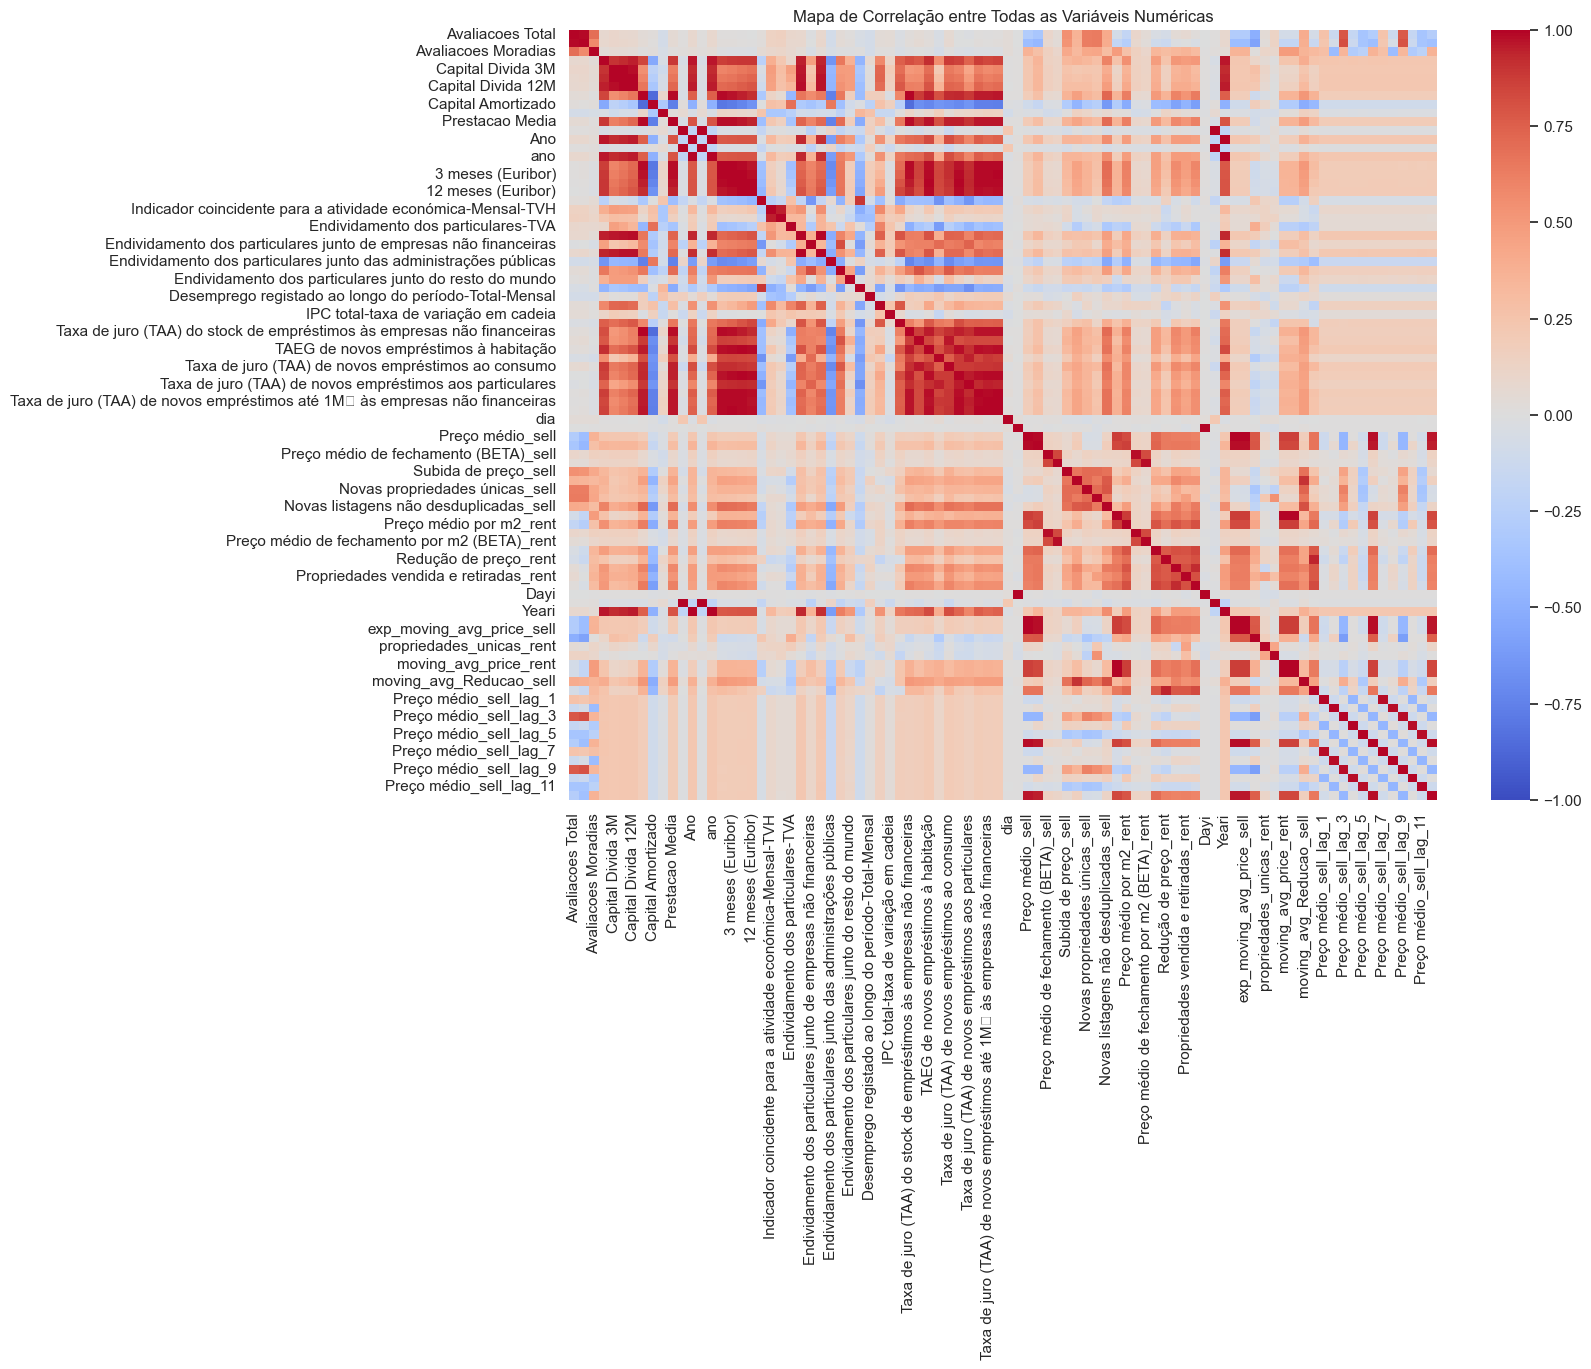

In [118]:

variaveis_corr = df_dados.select_dtypes(include=['float64', 'int64'])
correlacao = variaveis_corr.corr()

plt.figure(figsize=(14, 10)) 
sns.heatmap(correlacao,  cmap="coolwarm", vmin=-1, vmax=1) # annot=True,
plt.title('Mapa de Correlação entre Todas as Variáveis Numéricas')
plt.show()


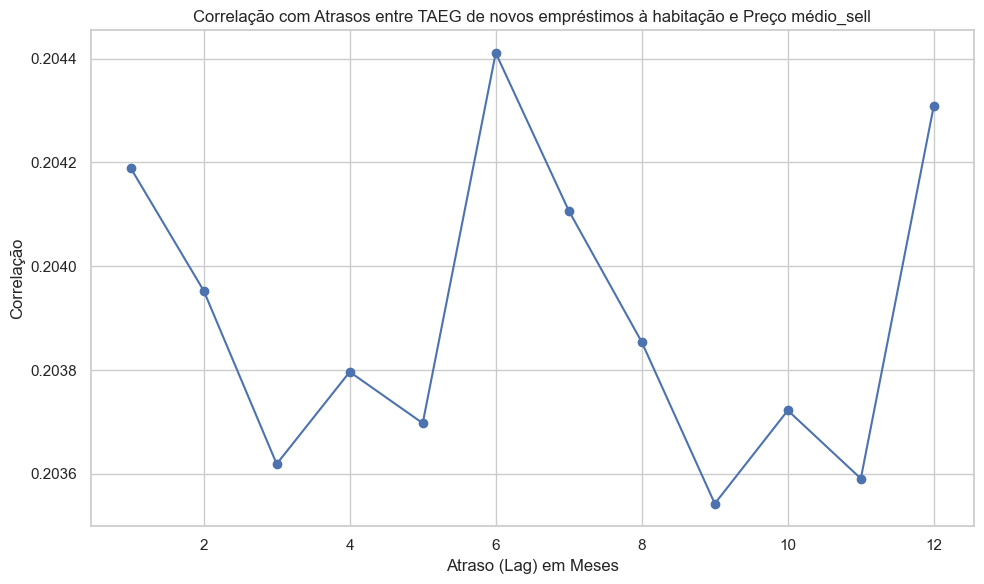

In [116]:
import pandas as pd

# Função para calcular correlação com diferentes atrasos (lags)
def calcular_corr_lags(df, x_var, y_var, max_lag):
    lags = range(1, max_lag+1)
    correlacoes = []

    for lag in lags:
        # Criar uma cópia do dataframe com a variável dependente (y_var) atrasada
        df[f'{y_var}_lag_{lag}'] = df[y_var].shift(lag)
        
        # Calcular a correlação entre a variável atrasada e a variável independente
        corr = df[[x_var, f'{y_var}_lag_{lag}']].corr().iloc[0, 1]
        correlacoes.append(corr)
    
    return correlacoes

# Definir variáveis de interesse
x_var = 'TAEG de novos empréstimos à habitação'  # Variável macroeconômica
y_var = 'Preço médio_sell'  # Variável de mercado imobiliário
max_lag = 12  # Número máximo de meses de atraso (1 ano)

# Calcular correlações com atrasos
correlacoes_lags = calcular_corr_lags(df_dados, x_var, y_var, max_lag)

# Plotar as correlações com lags
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_lag+1), correlacoes_lags, marker='o')
plt.title(f'Correlação com Atrasos entre {x_var} e {y_var}')
plt.xlabel('Atraso (Lag) em Meses')
plt.ylabel('Correlação')
plt.grid(True)
plt.tight_layout()
plt.show()


### Insights:

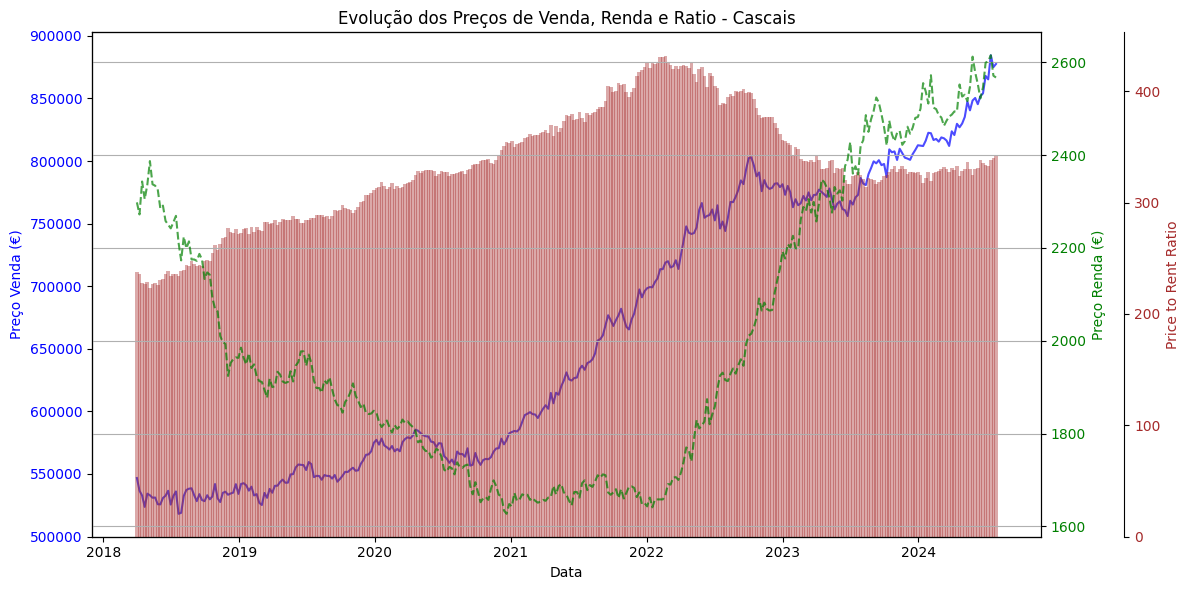

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

location = 'Cascais'  # 'Cascais', 'Loures', 'Oeiras', 'Sintra', 'Amadora', 'Odivelas'

location_price_data = df_dados[['Date', 'codLocation', 'Preço médio_sell', 'Preço médio_rent', 'price_to_rent_ratio', 'localizacao']].dropna()
location_price_data = location_price_data.sort_values(by=['Date', 'localizacao'])
location_data = location_price_data[location_price_data['localizacao'] == location]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(location_data['Date'], location_data['Preço médio_sell'], color='b', label='Venda', alpha=0.7)
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço Venda (€)', color='b')
ax1.tick_params(axis='y', labelcolor='b')


ax2 = ax1.twinx()

ax2.spines['right'].set_position(('outward', 60))
ax2.set_frame_on(True)
ax2.patch.set_visible(False) 

ax2.bar(location_data['Date'], location_data['price_to_rent_ratio'], color='brown', alpha=0.4, label='Price to Rent Ratio', width=10)
ax2.set_ylabel('Price to Rent Ratio', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')


ax3 = ax1.twinx()
ax3.plot(location_data['Date'], location_data['Preço médio_rent'], color='g', label='Renda', linestyle='dashed', alpha=0.7)
ax3.set_ylabel('Preço Renda (€)', color='g')
ax3.tick_params(axis='y', labelcolor='g')



# Título e layout
plt.title(f'Evolução dos Preços de Venda, Renda e Ratio - {location}')
fig.tight_layout()
plt.grid(True)

plt.show()

In [26]:
df_dados.columns

Index(['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
       'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado',
       'Unemployed population', 'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano',
       '1 mês (Euribor)', '3 meses (Euribor)', '6 meses (Euribor)',
       '12 meses (Euribor)',
       'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
       'Indicador coincidente para a atividade económica-Mensal-TVH',
       'Indicador coincidente para o consumo privado-Mensal-TVH',
       'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
       'Endividamento dos particulares junto de empresas não financeiras',
       'Endividamento dos particulares junto do setor financeiro',
       'Endividamento dos particulares junto das administrações públicas',
       'Endividamento dos particulares junto de particulares',
       'Endividamento dos particul

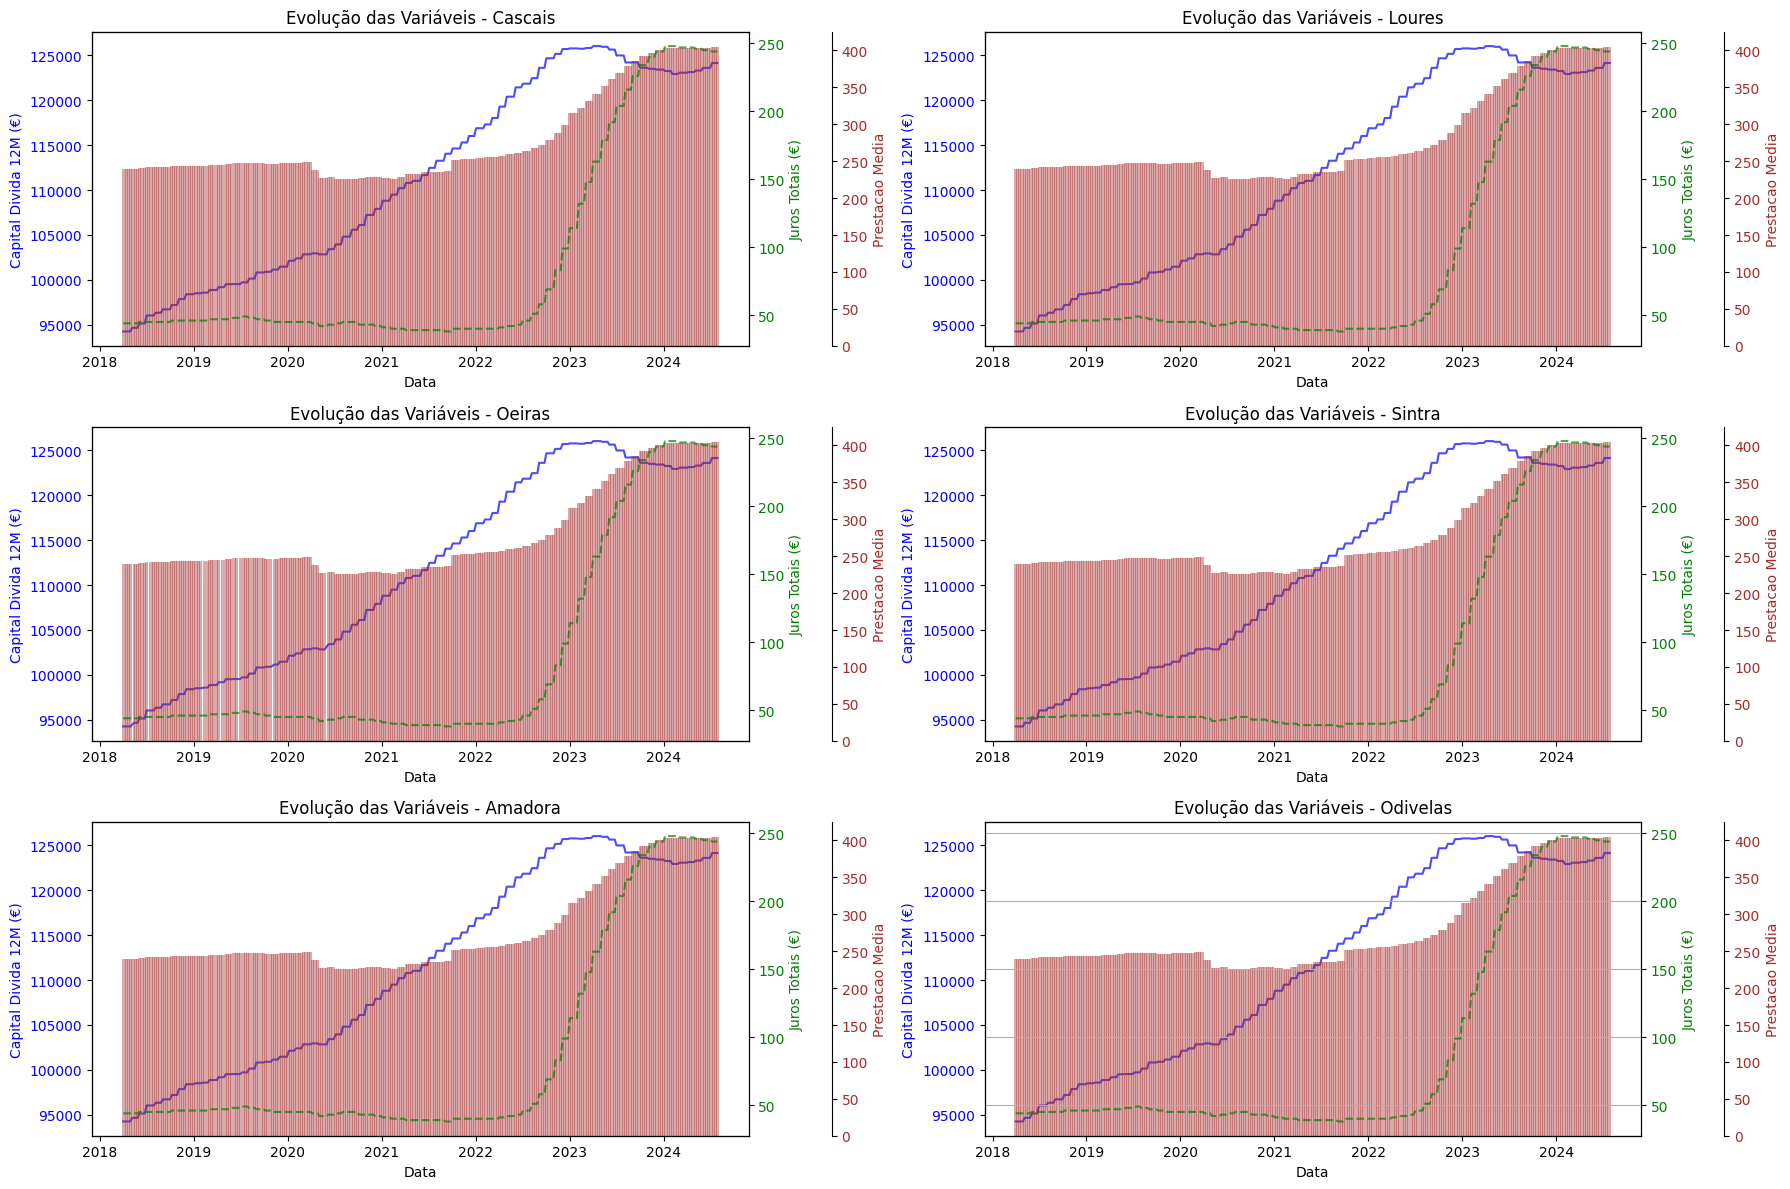

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de localizações
locations = ['Cascais', 'Loures', 'Oeiras', 'Sintra', 'Amadora', 'Odivelas']

# Definir as 3 variáveis que o usuário deseja visualizar
# Você pode substituir por qualquer outra variável do seu DataFrame
# var1 = '12 meses (Euribor)'  # 'Preço médio_sell'
# var2 = 'TAEG de novos empréstimos à habitação'  # 'Preço médio_rent' 
# var3 = 'Endividamento dos particulares'  # 'price_to_rent_ratio'

# var1 = 'Número de beneficiários de subsídio de desemprego (milhares)-mensal'
# var2 = 'Desemprego registado ao longo do período-Total-Mensal'
# var3 = 'Preço médio_sell'

# var1 = 'Indicador coincidente para a atividade económica-Mensal-TVH'
# var2 = 'IPC total-taxa de variação homóloga'
# var3 = 'Preço médio_sell'

# var1 = 'Endividamento dos particulares'
# var2 = 'Prestacao Media'
# var3 = 'Preço médio_rent'

# var1 = 'Taxa de juro (TAA) de novos empréstimos à habitação'
# var2 = 'TAEG de novos empréstimos ao consumo'
# var3 = 'Capital Divida Total'

# var1 = 'Novas propriedades únicas_sell'
# var2 = 'Propriedades vendida e retiradas_sell'
# var3 = 'Preço médio_sell'

# var1 = 'Preço médio_rent'
# var2 = 'Unemployed population'
# var3 = 'Endividamento dos particulares'

# var1 = 'Subida de preço_sell'
# var2 = 'Redução de preço_sell'
# var3 = 'Preço médio_sell'

var1 = 'Capital Divida 12M'
var2 = 'Juros Totais'
var3 = 'Prestacao Media'


# Filtrando e limpando os dados
location_price_data = df_dados[['Date', 'codLocation', var1, var2, var3, 'localizacao']].dropna()
location_price_data = location_price_data.sort_values(by=['Date', 'localizacao'])

fig, axes = plt.subplots(3, 2, figsize=(18, 12))

axes = axes.flatten()

for i, location in enumerate(locations):
    location_data = location_price_data[location_price_data['localizacao'] == location]

    ax1 = axes[i]

    # Plotar a primeira variável
    ax1.plot(location_data['Date'], location_data[var1], color='b', label=var1, alpha=0.7)
    ax1.set_xlabel('Data')
    ax1.set_ylabel(f'{var1} (€)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Criando o segundo eixo para a segunda variável (gráfico de barras)
    ax2 = ax1.twinx()
    ax2.spines['right'].set_position(('outward', 60))
    ax2.set_frame_on(True)
    ax2.patch.set_visible(False)

    ax2.bar(location_data['Date'], location_data[var3], color='brown', alpha=0.4, label=var3, width=10)
    ax2.set_ylabel(var3, color='brown')
    ax2.tick_params(axis='y', labelcolor='brown')

    # Criando o terceiro eixo para a terceira variável (gráfico de linha)
    ax3 = ax1.twinx()
    ax3.plot(location_data['Date'], location_data[var2], color='g', label=var2, linestyle='dashed', alpha=0.7)
    ax3.set_ylabel(f'{var2} (€)', color='g')
    ax3.tick_params(axis='y', labelcolor='g')

    # Adicionando o título para cada subplot
    ax1.set_title(f'Evolução das Variáveis - {location}')

# Remover qualquer eixo adicional que não tenha sido usado (caso não haja exatamente 6 localizações)
if len(locations) < len(axes):
    for j in range(len(locations), len(axes)):
        fig.delaxes(axes[j])

fig.tight_layout()
plt.grid(True)

plt.show()



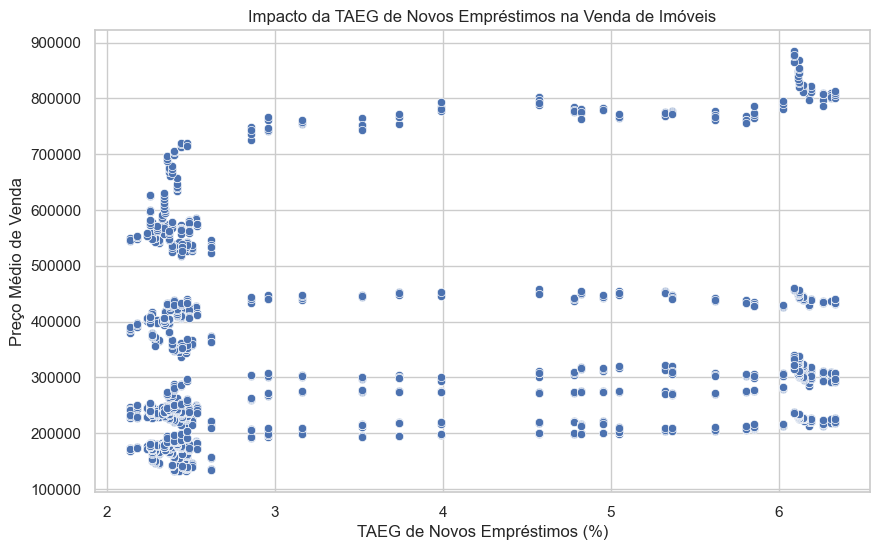

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TAEG de novos empréstimos à habitação', y='Preço médio_sell', data=df_dados)
plt.title('Impacto da TAEG de Novos Empréstimos na Venda de Imóveis')
plt.xlabel('TAEG de Novos Empréstimos (%)')
plt.ylabel('Preço Médio de Venda')
plt.show()

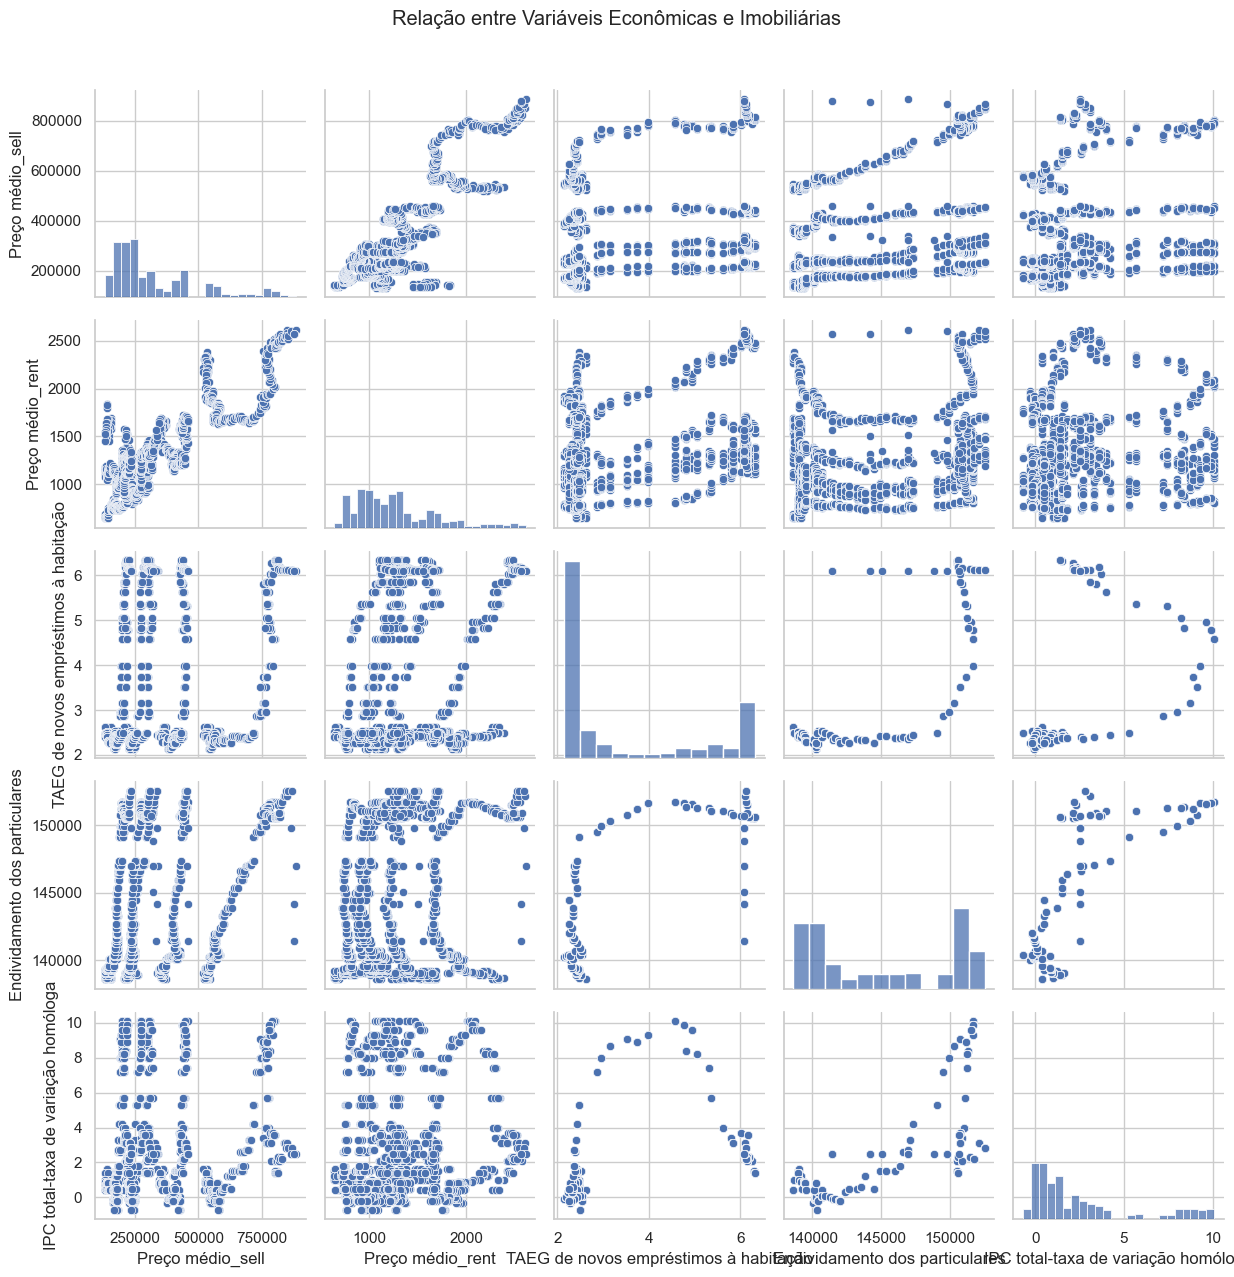

In [129]:
# Pairplot para comparar várias variáveis de interesse
sns.pairplot(df_dados[['Preço médio_sell', 'Preço médio_rent', 'TAEG de novos empréstimos à habitação', 
                       'Endividamento dos particulares', 'IPC total-taxa de variação homóloga']])
plt.suptitle('Relação entre Variáveis Econômicas e Imobiliárias', y=1.02)
plt.tight_layout()
plt.show()

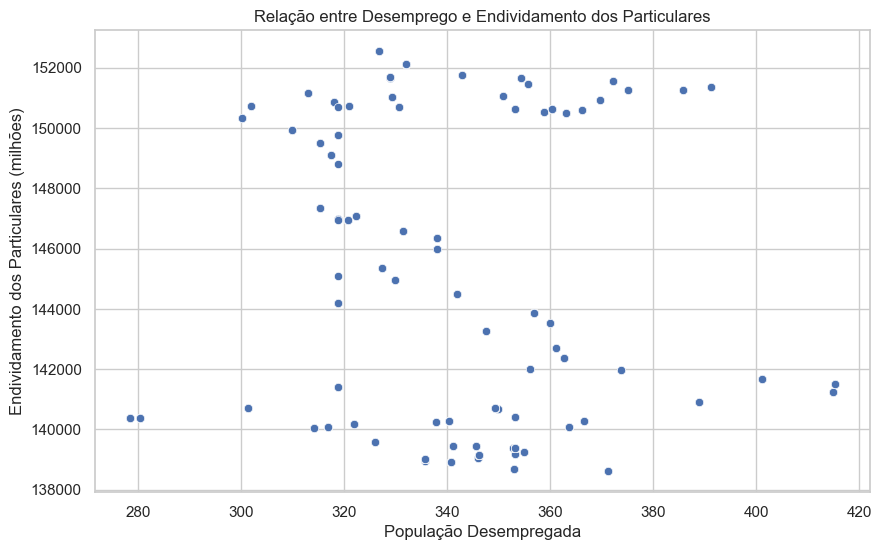

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployed population', 
                y='Endividamento dos particulares', data=df_dados)
plt.title('Relação entre Desemprego e Endividamento dos Particulares')
plt.xlabel('População Desempregada')
plt.ylabel('Endividamento dos Particulares (milhões)')
plt.show()

### Volatilidades

In [1]:
import matplotlib.pyplot as plt

# Certifique-se de que a coluna 'localizacao' está corretamente definida
if 'localizacao' not in df_dados.columns:
    df_dados['localizacao'] = df_dados['codLocation'].map(locationD)

# 1. Criar uma cópia dos dados
df_dadosV = df_dados.copy()

# 2. Cálculo da variação percentual (retornos semanais) para cada localidade
df_dadosV['pct_change'] = df_dadosV.groupby('localizacao')['Preço médio_sell'].pct_change()

# 3. Cálculo da volatilidade em janelas móveis para cada localidade
# Usando janela de 12 semanas (aproximadamente 3 meses)
df_dadosV['volatilidade_movel'] = df_dadosV.groupby('localizacao')['pct_change'].rolling(window=12).std().reset_index(level=0, drop=True)

# Se você preferir calcular para uma janela de 52 semanas (1 ano), pode usar a linha abaixo:
# df_dadosV['volatilidade_movel'] = df_dadosV.groupby('localizacao')['pct_change'].rolling(window=52).std().reset_index(level=0, drop=True)

# 4. Plotar a volatilidade para cada localidade
localidades_unicas = df_dadosV['localizacao'].unique()

plt.figure(figsize=(12, 8))

# Iterar sobre cada localidade e plotar a volatilidade
for local in localidades_unicas:
    df_local = df_dadosV[df_dadosV['localizacao'] == local]
    plt.plot(df_local['Date'], df_local['volatilidade_movel'], label=local)

# Configurar o gráfico
plt.title('Volatilidade da Variável "Preço médio_sell" por Localidade ao Longo do Tempo (12 semanas)')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend(title="Localidades", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



KeyboardInterrupt



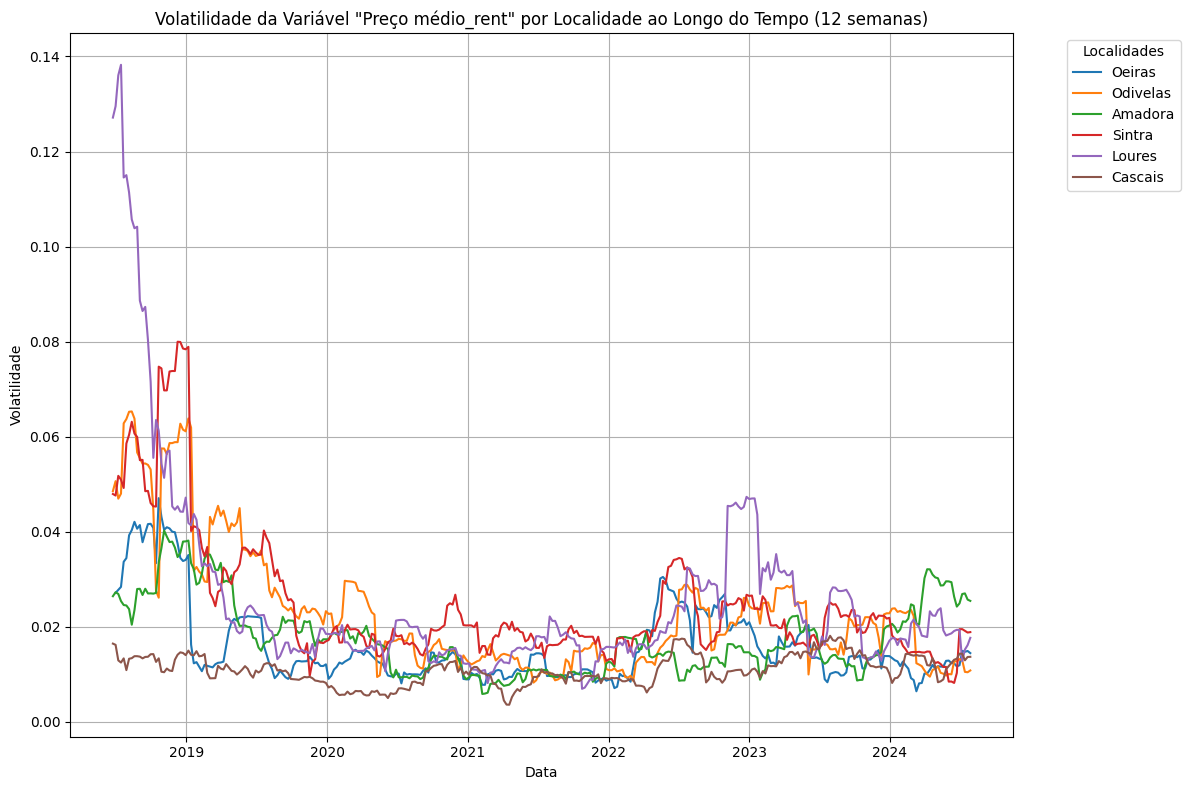

In [40]:
import matplotlib.pyplot as plt

# Certifique-se de que a coluna 'localizacao' está corretamente definida
if 'localizacao' not in df_dados.columns:
    df_dados['localizacao'] = df_dados['codLocation'].map(locationD)

# 1. Criar uma cópia dos dados
df_dadosV = df_dados.copy()

# 2. Cálculo da variação percentual (retornos semanais) para o preço de arrendamento por localidade
df_dadosV['pct_change_rent'] = df_dadosV.groupby('localizacao')['Preço médio_rent'].pct_change()

# 3. Cálculo da volatilidade em janelas móveis para o preço de arrendamento por localidade
# Usando janela de 12 semanas (aproximadamente 3 meses)
df_dadosV['volatilidade_movel_rent'] = df_dadosV.groupby('localizacao')['pct_change_rent'].rolling(window=12).std().reset_index(level=0, drop=True)

# Se você preferir calcular para uma janela de 52 semanas (1 ano), pode usar a linha abaixo:
# df_dadosV['volatilidade_movel_rent'] = df_dadosV.groupby('localizacao')['pct_change_rent'].rolling(window=52).std().reset_index(level=0, drop=True)

# 4. Plotar a volatilidade para cada localidade (Arrendamento)
localidades_unicas = df_dadosV['localizacao'].unique()

plt.figure(figsize=(12, 8))

# Iterar sobre cada localidade e plotar a volatilidade
for local in localidades_unicas:
    df_local = df_dadosV[df_dadosV['localizacao'] == local]
    plt.plot(df_local['Date'], df_local['volatilidade_movel_rent'], label=local)

# Configurar o gráfico
plt.title('Volatilidade da Variável "Preço médio_rent" por Localidade ao Longo do Tempo (12 semanas)')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend(title="Localidades", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


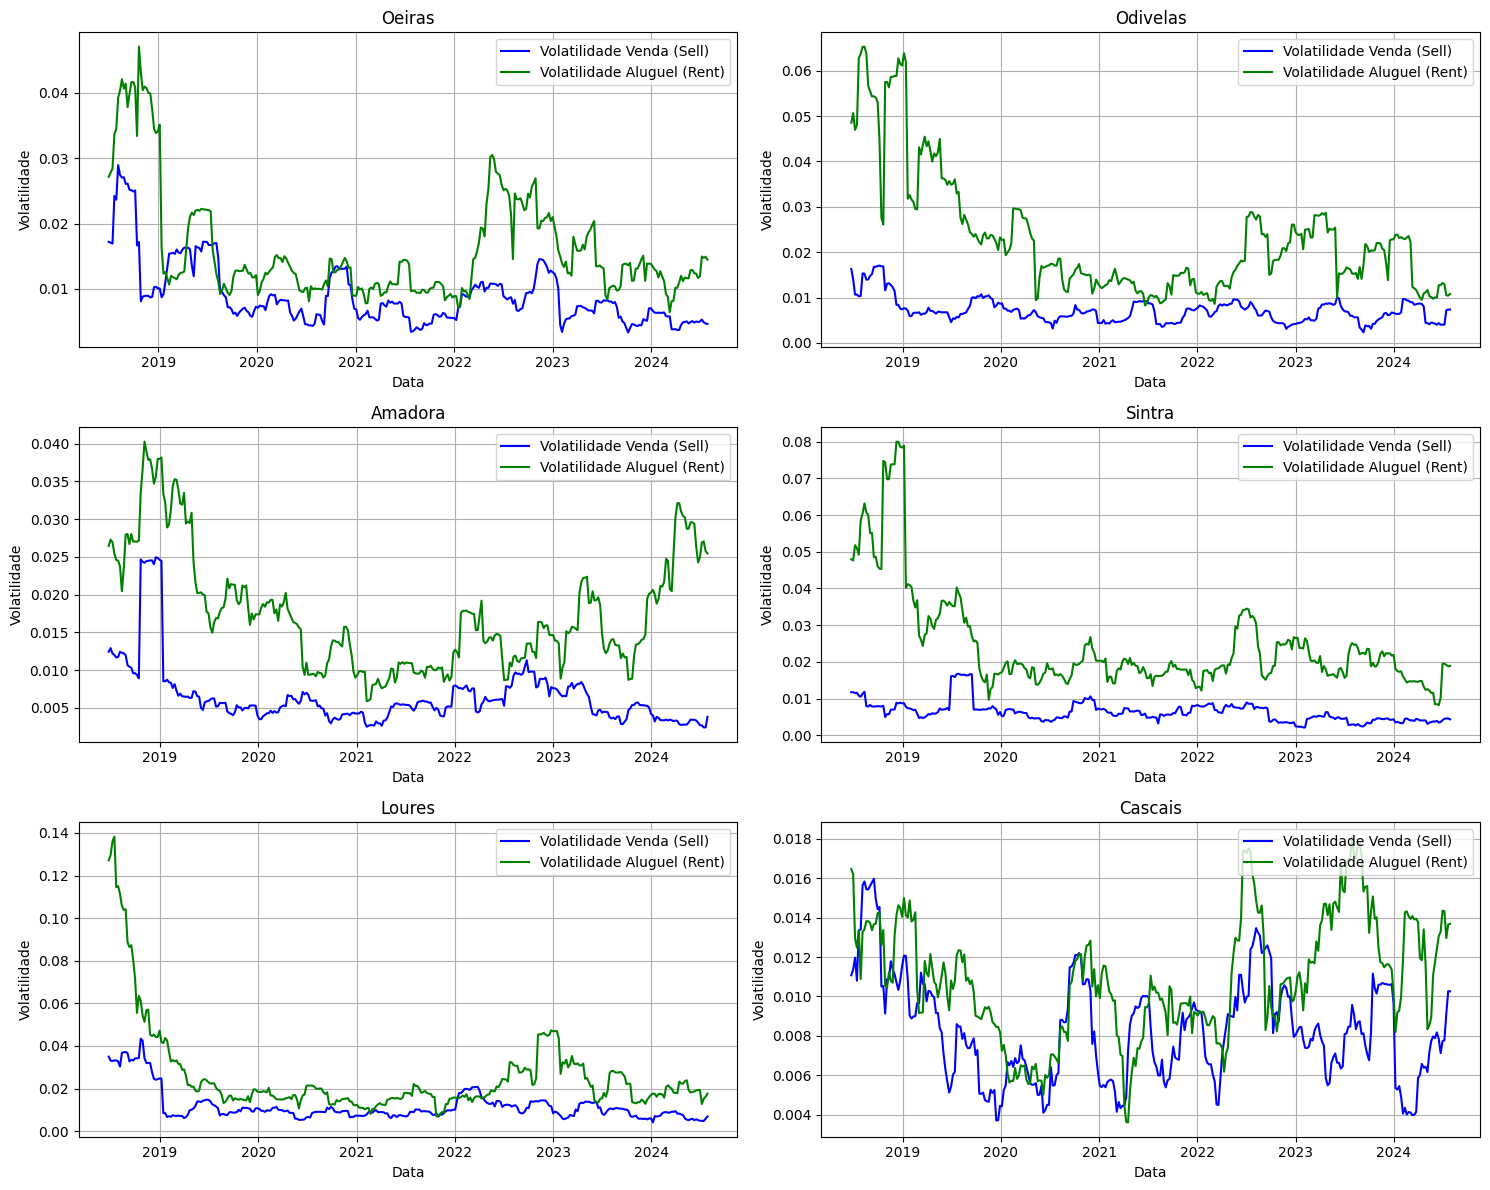

In [49]:
import matplotlib.pyplot as plt

# Definir as localizações para plotar
localizacoes = df_dados['localizacao'].unique()

# Certifique-se de que a coluna 'localizacao' está corretamente definida
if 'localizacao' not in df_dados.columns:
    df_dados['localizacao'] = df_dados['codLocation'].map(locationD)

# Criar a figura e os subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # 3 linhas, 2 colunas
axes = axes.flatten()  # Flatten para iterar mais facilmente

# Definir os limites do eixo Y (ajuste conforme necessário)
ylim_min = 0
ylim_max = 0.14  # Escolha um valor apropriado com base nos dados

# Iterar sobre as localizações e plotar para cada uma
for i, local in enumerate(localizacoes):
    # Filtrar os dados para a localidade atual
    df_c = df_dados[df_dados['localizacao'] == local].copy()

    # 1. Cálculo da variação percentual para venda (sell) e aluguel (rent)
    df_c['pct_change_sell'] = df_c['Preço médio_sell'].pct_change()
    df_c['pct_change_rent'] = df_c['Preço médio_rent'].pct_change()

    # 2. Cálculo da volatilidade em janelas móveis de 12 semanas para venda (sell) e aluguel (rent)
    df_c['volatilidade_movel_sell'] = df_c['pct_change_sell'].rolling(window=12).std()
    df_c['volatilidade_movel_rent'] = df_c['pct_change_rent'].rolling(window=12).std()

    # 3. Plotar a volatilidade para venda e aluguel na mesma escala
    axes[i].plot(df_c['Date'], df_c['volatilidade_movel_sell'], label='Volatilidade Venda (Sell)', color='blue')
    axes[i].plot(df_c['Date'], df_c['volatilidade_movel_rent'], label='Volatilidade Aluguel (Rent)', color='green')

    # Configurações do subgráfico
    axes[i].set_title(f'{local}')
    axes[i].set_xlabel('Data')
    axes[i].set_ylabel('Volatilidade')
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

    # Definir o mesmo limite de escala para todos os subgráficos
    # axes[i].set_ylim([ylim_min, ylim_max])

# Ajustar layout da figura
plt.tight_layout()
plt.show()


### Analise da performace dos modelos

In [ ]:
# import papermill as pm

# # Caminhos dos notebooks que você deseja executar
# notebooks = [
#     'notebook1.ipynb',
#     'notebook2.ipynb',
#     'notebook3.ipynb',
#     'notebook4.ipynb'
# ]

# # Laço para executar os notebooks em sequência
# for notebook in notebooks:
#     print(f"Executando {notebook}...")
#     pm.execute_notebook(notebook, f'output_{notebook}')  # Executa e gera um notebook de saída
#     print(f"{notebook} finalizado.")

In [4]:
import papermill as pm
import os

if True:
    os.remove("modelos/resultadosModelos.json")


output_dir = 'executed_notebooks'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Lista de notebooks para executar
notebooks = [
    'LinearRegressionModel.ipynb',
    'RandomForestModel.ipynb',
    'MLP.ipynb',
    'LSTM.ipynb'
]

for notebook in notebooks:
    notebook_output = os.path.join(output_dir, f'output_{notebook}')
    pm.execute_notebook(notebook, notebook_output)
    print(f"Notebook {notebook} executado com sucesso e salvo em: {notebook_output}")


Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Notebook LinearRegressionModel.ipynb executado com sucesso e salvo em: executed_notebooks\output_LinearRegressionModel.ipynb


Executing:   0%|          | 0/19 [00:00<?, ?cell/s]

Notebook RandomForestModel.ipynb executado com sucesso e salvo em: executed_notebooks\output_RandomForestModel.ipynb


Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Notebook MLP.ipynb executado com sucesso e salvo em: executed_notebooks\output_MLP.ipynb


Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Notebook LSTM.ipynb executado com sucesso e salvo em: executed_notebooks\output_LSTM.ipynb


In [5]:
import os
import json
import pandas as pd

directory = "modelos"
json_filename = os.path.join(directory, 'resultadosModelos.json')

# with open(json_filename, 'r') as json_file:
#     existing_data = json.load(json_file)

# existing_data
df_json = pd.read_json(json_filename)

# Create a list to hold all expanded rows
expanded_rows = []

# Iterate over each row of the original DataFrame
for idx, row in df_json.iterrows():
    modelo = row['Modelo']
    localizacao = row['Localização']
    resultados = row['Resultados']
    
    # For each entry in the 'Resultados' list, create a new row
    for result in resultados:
        expanded_row = {
            'Modelo': modelo,  # Keep the model name
            'Conjunto': result['Conjunto'],  # Separate column for Conjunto
            'Localização': localizacao,
            'MAE': result['MAE'],
            'R²': result['R²'],
            'MSE': result['MSE'],
            'Acurácia (%)': result['Acurácia (%)']
        }
        expanded_rows.append(expanded_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

expanded_df.head(20)

Modelo                    Conjunto  Localização           MAE  \
0   Linear Regression                      Treino      1711115   3215.849015   
1   Linear Regression                       Teste      1711115  59152.622861   
2   Linear Regression                   Validação      1711115   3005.501336   
3   Linear Regression            TimeSeries Split      1711115   3117.859915   
4   Linear Regression  TimeSeries Split Validação      1711115  40804.745249   
5       Random Forest                      Treino      1711115    346.523558   
6       Random Forest                       Teste      1711115   7229.717923   
7       Random Forest                   Validação      1711115  90553.178340   
8       Random Forest    TimeSeries Split (Teste)      1711115   9654.738970   
9                 MLP                      Treino      1711115    751.588474   
10                MLP                       Teste      1711115   2886.864583   
11                MLP                   Validação      1711115  13040.927849   
12               LSTM                      Treino      1711115    647.780574   
13               LSTM                       Teste      1711115   3103.587595   
14               LSTM                   Validação      1711115  10273.000000   

            R²           MSE  Acurácia (%)  
0     0.957727  1.494587e+07     98.159929  
1  -156.468443  4.435167e+09     72.598612  
2     0.065201  1.360581e+07     98.688688  
3     0.600666  1.369593e+07     98.618399  
4  -339.406335  1.059123e+10     71.989468  
5     0.997172  9.998824e+05     99.801723  
6    -1.785762  7.846219e+07     96.650963  
7  -563.350399  8.214003e+09     60.491283  
8    -2.802098  1.304002e+08     95.721746  
9     0.997399  9.195684e+05     99.569950  
10    0.552676  1.259908e+07     98.662712  
11  -11.516542  1.821757e+08     94.310191  
12    0.998096  6.731538e+05     99.629348  
13    0.446537  1.558852e+07     98.562319  
14   -6.864072  1.144599e+08     95.517849

In [13]:
df = expanded_df[~expanded_df['Conjunto'].str.contains('Treino')]
df.head(20)

Modelo                    Conjunto  Localização           MAE  \
1   Linear Regression                       Teste      1711115  59152.622861   
2   Linear Regression                   Validação      1711115   3005.501336   
3   Linear Regression            TimeSeries Split      1711115   3117.859915   
4   Linear Regression  TimeSeries Split Validação      1711115  40804.745249   
6       Random Forest                       Teste      1711115   7229.717923   
7       Random Forest                   Validação      1711115  90553.178340   
8       Random Forest    TimeSeries Split (Teste)      1711115   9654.738970   
10                MLP                       Teste      1711115   2886.864583   
11                MLP                   Validação      1711115  13040.927849   
13               LSTM                       Teste      1711115   3103.587595   
14               LSTM                   Validação      1711115  10273.000000   

            R²           MSE  Acurácia (%)  
1  -156.468443  4.435167e+09     72.598612  
2     0.065201  1.360581e+07     98.688688  
3     0.600666  1.369593e+07     98.618399  
4  -339.406335  1.059123e+10     71.989468  
6    -1.785762  7.846219e+07     96.650963  
7  -563.350399  8.214003e+09     60.491283  
8    -2.802098  1.304002e+08     95.721746  
10    0.552676  1.259908e+07     98.662712  
11  -11.516542  1.821757e+08     94.310191  
13    0.446537  1.558852e+07     98.562319  
14   -6.864072  1.144599e+08     95.517849

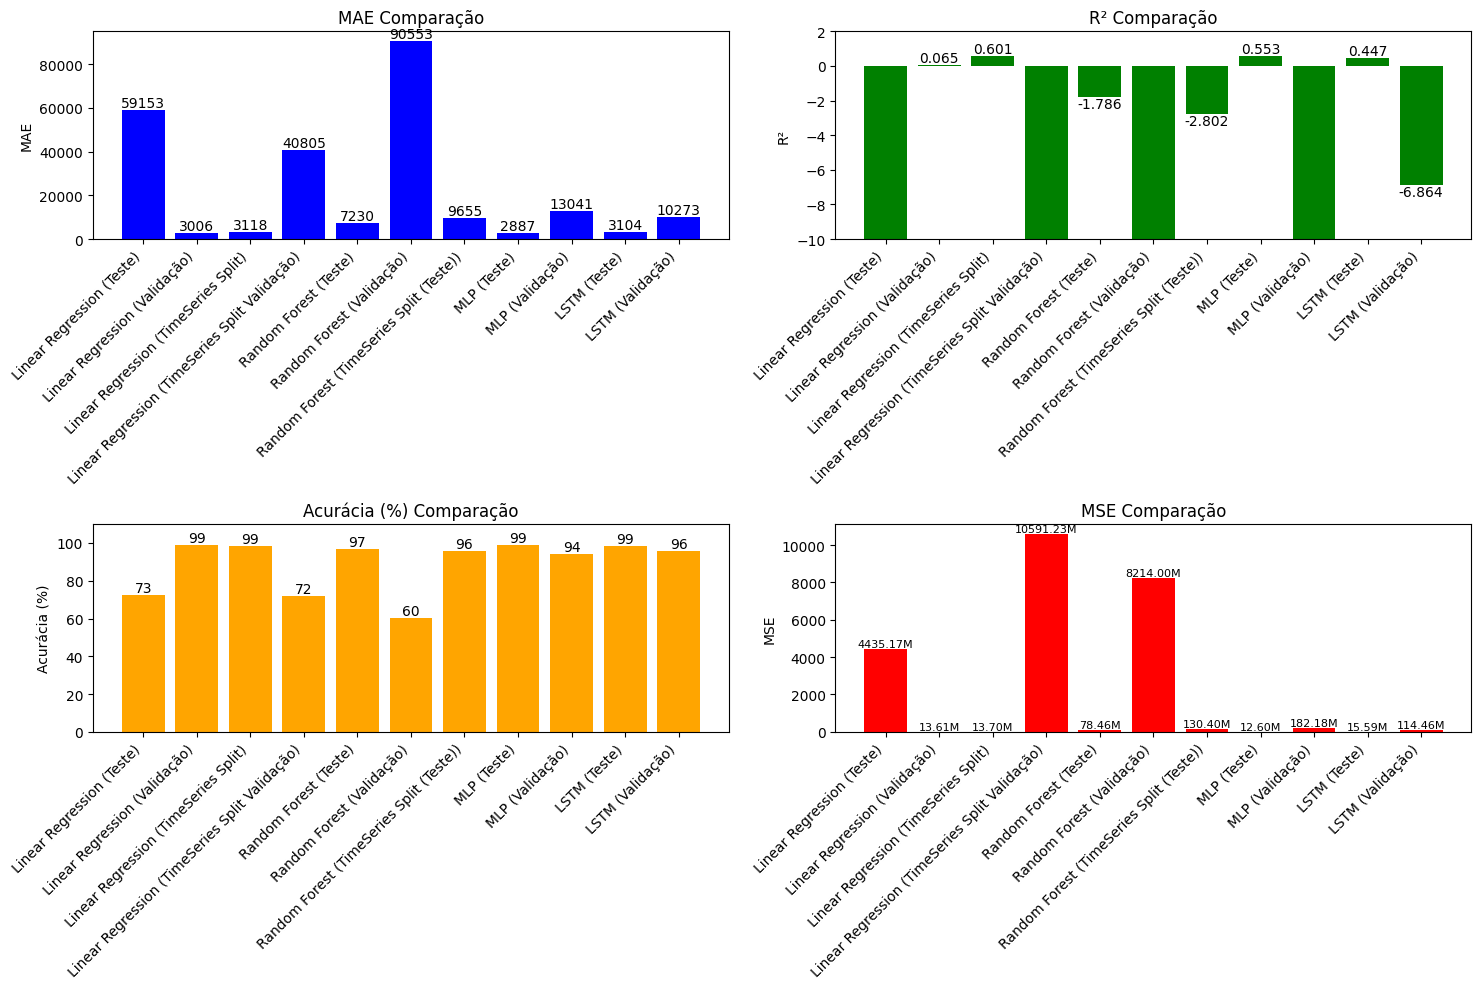

In [20]:
import matplotlib.pyplot as plt

# df = expanded_df

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

x_labels = df['Modelo'] + " (" + df['Conjunto'] + ")"

bars_mae = axes[0, 0].bar(x_labels, df['MAE'], color='blue')
axes[0, 0].set_title('MAE Comparação')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].bar_label(bars_mae, fmt='%.0f')

bars_r2 = axes[0, 1].bar(x_labels, df['R²'], color='green')
axes[0, 1].set_title('R² Comparação')
axes[0, 1].set_ylabel('R²')
axes[0, 1].set_ylim(-10, 2)
axes[0, 1].bar_label(bars_r2, fmt='%.3f')

bars_acc = axes[1, 0].bar(x_labels, df['Acurácia (%)'], color='orange')
axes[1, 0].set_ylim(0, 110)
axes[1, 0].set_title('Acurácia (%) Comparação')
axes[1, 0].set_ylabel('Acurácia (%)')
axes[1, 0].bar_label(bars_acc, fmt='%.0f')

bars_mse = axes[1, 1].bar(x_labels, df['MSE'] / 1_000_000, color='red')
axes[1, 1].set_title('MSE Comparação')
axes[1, 1].set_ylabel('MSE')
axes[1, 1].bar_label(bars_mse, fmt='%.2fM', fontsize=8)

for ax in axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()


KeyError: 'R2'

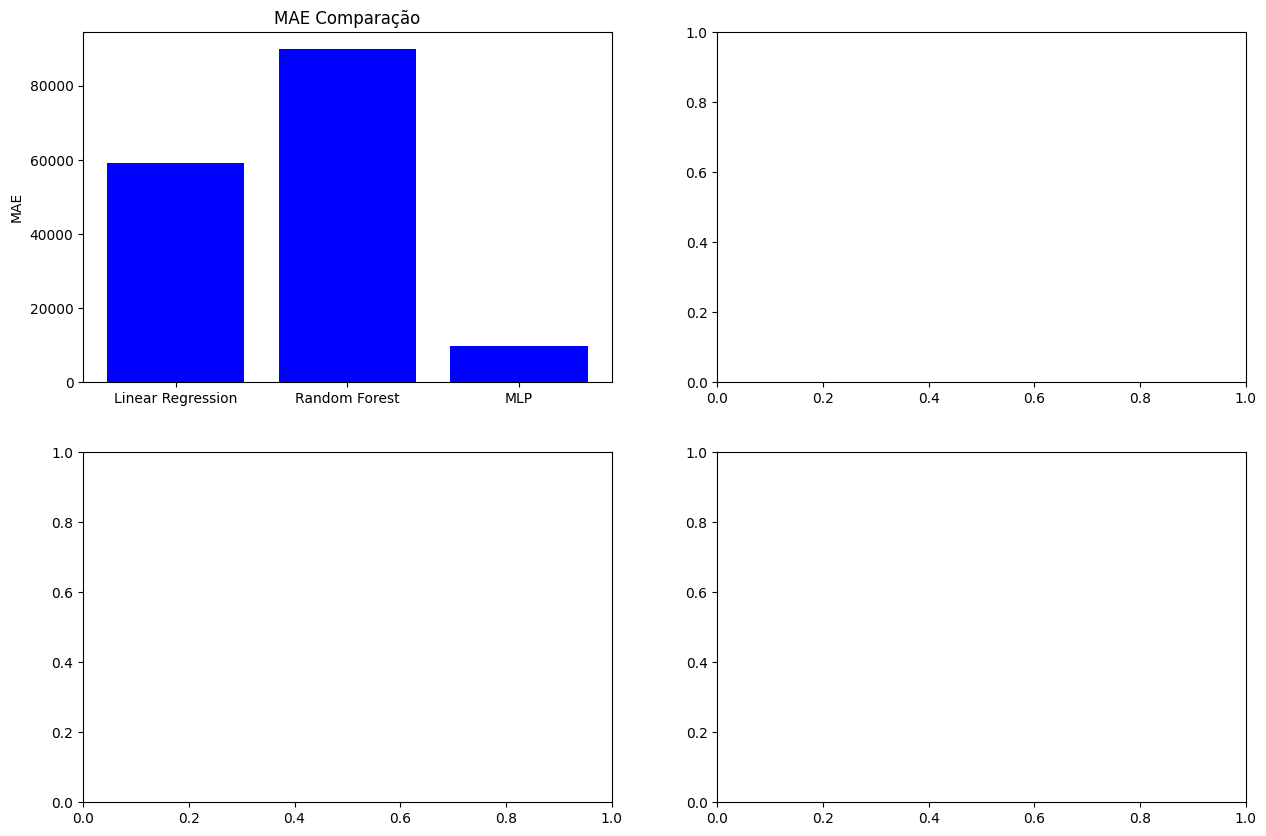

In [21]:




data = {
    'Modelo': [
        'Regressão Linear', 
        'Regressão Linear | TimeSeriesSplit', 
        'Random Forest', 
        'Random Forest | TimeSeriesSplit', 
        'Dense Neural Network (MLP)', 
        'Redes Neurais Recorrentes (LSTM)'
    ],
    'MAE': [59152.0, 3117.0, 9742.0, 9742.0, 6775.0, 6257.0],
    'R2': [-156.46, 0.600, -2.89, -2.89, 0.636, 0.706],
    'Acurácia (%)': [72.59, 98.61, 95.68, 95.68, None, None],
    'MSE': [4435166683, 13695927, 133518709, 133518709, 71710290, 57885163]
}

# Convertendo os dados em um DataFrame
df = expanded_df

# Plotando os gráficos de comparação
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico MAE
axes[0, 0].bar(df['Modelo'], df['MAE'], color='blue')
axes[0, 0].set_title('MAE Comparação')
axes[0, 0].set_ylabel('MAE')

# Gráfico R2
axes[0, 1].bar(df['Modelo'], df['R2'], color='green')
axes[0, 1].set_title('R2 Comparação')
axes[0, 1].set_ylabel('R2')
axes[0, 1].set_ylim(-10, 2)



# Gráfico Acurácia
axes[1, 0].bar(df['Modelo'], df['Acurácia (%)'], color='orange')
axes[1, 0].set_title('Acurácia (%) Comparação')
axes[1, 0].set_ylabel('Acurácia (%)')

# Gráfico MSE
axes[1, 1].bar(df['Modelo'], df['MSE'], color='red')
axes[1, 1].set_title('MSE Comparação')
axes[1, 1].set_ylabel('MSE')

# Ajustar os rótulos do eixo x para que não se sobreponham
for ax in axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

### Outros interessantes analises

#### Initial Exploration

In [4]:
print("Data Overview:")
print(df_dados.info())
print("\nFirst 5 rows:")
print(df_dados.head())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 248 to 1948
Data columns (total 79 columns):
 #   Column                                                                                   Non-Null Count  Dtype         
---  ------                                                                                   --------------  -----         
 0   Avaliacoes Total                                                                         1979 non-null   int64         
 1   Avaliacoes Apartamentos                                                                  1979 non-null   int64         
 2   Avaliacoes Moradias                                                                      1979 non-null   float64       
 3   Capital Divida Total                                                                     1979 non-null   int64         
 4   Capital Divida 3M                                                                        1979 non-null   int64         
 5   C

#### Check for Missing Values

In [5]:
# 3. Check for Missing Values
print("\nMissing Values:")
print(df_dados.isnull().sum())



Missing Values:
Avaliacoes Total             0
Avaliacoes Apartamentos      0
Avaliacoes Moradias          0
Capital Divida Total         0
Capital Divida 3M            0
                            ..
moving_avg_price_rent        0
exp_moving_avg_price_rent    0
moving_avg_Reducao_sell      0
moving_avg_Reducao_rent      0
localizacao                  0
Length: 79, dtype: int64


####  Descriptive Statistics

In [6]:
print("\nDescriptive Statistics:")
print(df_dados.describe())


Descriptive Statistics:
       Avaliacoes Total  Avaliacoes Apartamentos  Avaliacoes Moradias  \
count       1979.000000              1979.000000          1979.000000   
mean         643.576554               546.332491            97.548257   
min          230.000000               206.000000             7.000000   
25%          451.000000               380.000000            55.000000   
50%          518.000000               433.000000            76.000000   
75%          607.000000               517.000000           157.000000   
max         1756.000000              1513.000000           245.000000   
std          340.853618               300.792090            63.198205   

       Capital Divida Total  Capital Divida 3M  Capital Divida 6M  \
count           1979.000000        1979.000000        1979.000000   
mean           57523.668519      114265.864578      113146.074785   
min            51817.000000       96066.000000       95476.000000   
25%            53426.000000      103208.0

#### Correlation Matrix

In [7]:
numeric_columns = df_dados.select_dtypes(include='number').corr()

print("\nCorrelation Matrix:")
print(numeric_columns)


Correlation Matrix:
                           Avaliacoes Total  Avaliacoes Apartamentos  \
Avaliacoes Total                   1.000000                 0.988132   
Avaliacoes Apartamentos            0.988132                 1.000000   
Avaliacoes Moradias                0.689564                 0.570339   
Capital Divida Total               0.076195                 0.080600   
Capital Divida 3M                  0.095966                 0.098149   
...                                     ...                      ...   
propriedades_unicas_sell           0.130544                 0.129025   
moving_avg_price_rent             -0.073894                -0.186554   
exp_moving_avg_price_rent         -0.073985                -0.186791   
moving_avg_Reducao_sell            0.402952                 0.382876   
moving_avg_Reducao_rent           -0.066355                -0.141726   

                           Avaliacoes Moradias  Capital Divida Total  \
Avaliacoes Total                      0.68

c:\Users\ruben\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\ruben\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


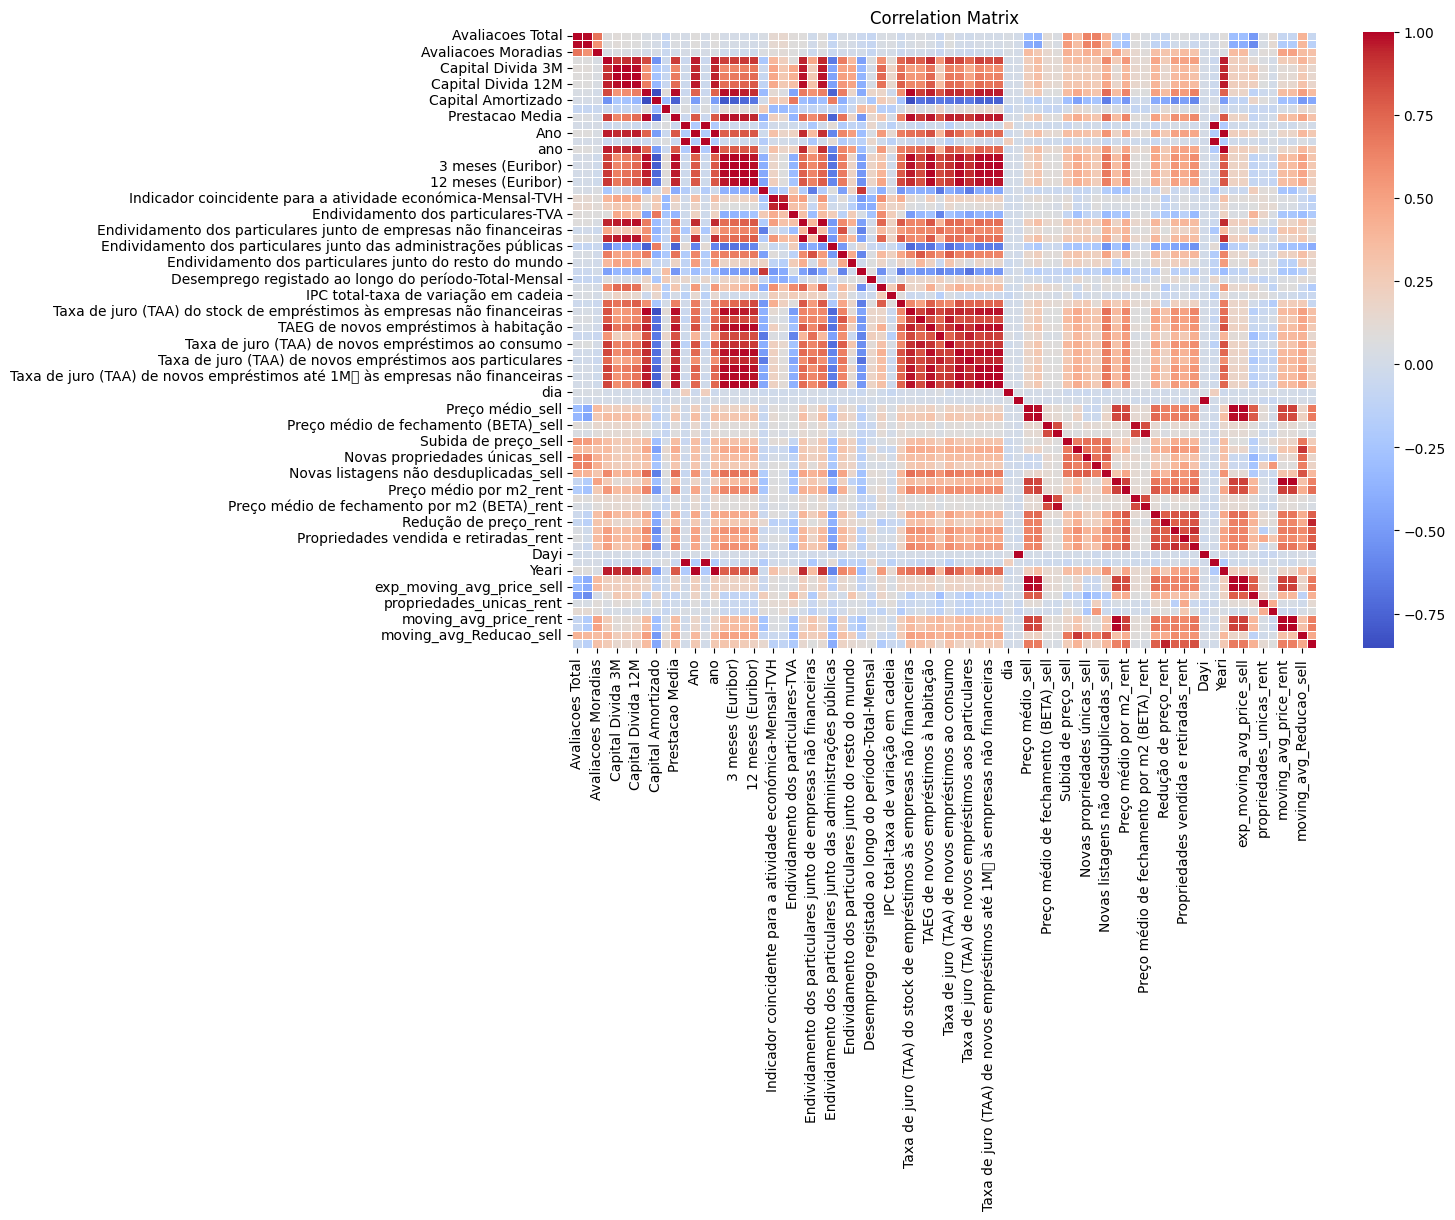

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### Visualization of Prices over Time

In [9]:
# Sell Price Analysis
print("\nSell Price Statistics:")
print(df_dados[['Preço médio_sell', 'Preço médio por m2_sell', 'Subida de preço_sell', 'Redução de preço_sell']].describe())

# Rent Price Analysis
print("\nRent Price Statistics:")
print(df_dados[['Preço médio_rent', 'Preço médio por m2_rent', 'Subida de preço_rent', 'Redução de preço_rent']].describe())



Sell Price Statistics:
       Preço médio_sell  Preço médio por m2_sell  Subida de preço_sell  \
count       1979.000000              1979.000000           1979.000000   
mean      327577.397676              2801.538403             12.192016   
std       174888.643953               990.052454              7.953655   
min       131948.000000              1309.000000              0.000000   
25%       207902.500000              2129.000000              7.000000   
50%       246282.000000              2507.000000             11.000000   
75%       421436.000000              3189.500000             16.000000   
max       884466.000000              5768.000000             66.000000   

       Redução de preço_sell  
count            1979.000000  
mean               24.458565  
std                16.482067  
min                 0.000000  
25%                13.000000  
50%                21.000000  
75%                31.000000  
max               150.000000  

Rent Price Statistics:
      

In [10]:
df_dados.columns

Index(['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
       'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado',
       'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
       'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano', '1 mês (Euribor)',
       '3 meses (Euribor)', '6 meses (Euribor)', '12 meses (Euribor)',
       'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
       'Indicador coincidente para a atividade económica-Mensal-TVH',
       'Indicador coincidente para o consumo privado-Mensal-TVH',
       'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
       'Endividamento dos particulares junto de empresas não financeiras',
       'Endividamento dos particulares junto do setor financeiro',
       'Endividamento dos particulares junto das administrações públicas',
       'Endividamento dos parti

In [97]:
import plotly.express as px
import pandas as pd

df_dados['Date'] = pd.to_datetime(df_dados['Date'], format='%Y%m%d')
df_dados = df_dados.sort_values(by=['Date', 'codLocation'])

# variaveis_disponiveis = ['Subida de preço_sell', 'Redução de preço_sell', 'Preço médio_sell', 'Preço médio_rent']

local = "Cascais"

def criar_grafico(localizacao, variaveis):
    df_local = df_dados[df_dados['localizacao'] == localizacao]

    fig = px.line(df_local, x='Date', y=variaveis,
                  title=f'Evolução das Variáveis em {localizacao}',
                  labels={'value': 'Valor', 'variable': 'Variável Selecionada'},
                  markers=True)
    
    fig.update_layout(
        xaxis_title='Data',
        yaxis_title='Valor',
        legend_title='Variável',
        hovermode='x unified',
        template='plotly_dark',  # Tema escuro
        title={
            'text': f'Evolução das Variáveis em {localizacao}',
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 22, 'color': 'white'}
        },
        font=dict(family="Arial, sans-serif", size=12, color="white"),
        plot_bgcolor='rgba(0,0,0,0)',  # Remove o fundo cinza padrão
        paper_bgcolor='rgba(0,0,0,0)',  # Remove o fundo cinza ao redor
        legend=dict(
            x=0.02, y=0.98,
            traceorder="normal",
            bgcolor="rgba(0,0,0,0.6)",
            bordercolor="rgba(255,255,255,0.6)",
            borderwidth=1
        ),
        height=800  
    )

    fig.update_traces(
        line=dict(width=2),  
        marker=dict(size=8, symbol='circle-open'), 
        mode='lines+markers'
    )

    fig.show()


variaveis_selecionadas = ['Propriedades vendida e retiradas_sell', 'Novas propriedades únicas_sell',  'propriedades_unicas_sell']
# variaveis_selecionadas = ['Propriedades vendida e retiradas_rent', 'Novas propriedades únicas_rent',  'propriedades_unicas_rent']

criar_grafico(local, variaveis_selecionadas)

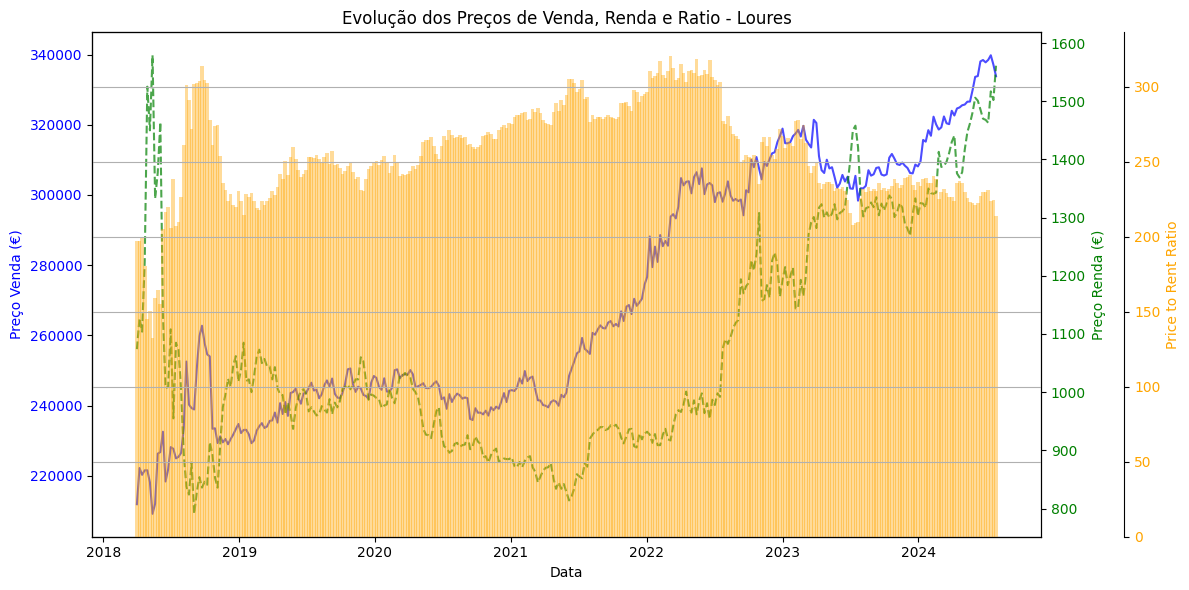

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'location' é a localização que você quer visualizar
location = 'Loures'  # 'Cascais', 'Loures', 'Oeiras', 'Sintra', 'Amadora', 'Odivelas'

location_price_data = df_dados[['Date', 'codLocation', 'Preço médio_sell', 'Preço médio_rent', 'price_to_rent_ratio', 'localizacao']].dropna()
location_price_data = location_price_data.sort_values(by=['Date', 'localizacao'])
location_data = location_price_data[location_price_data['localizacao'] == location]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(location_data['Date'], location_data['Preço médio_sell'], color='b', label='Venda', alpha=0.7)
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço Venda (€)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(location_data['Date'], location_data['Preço médio_rent'], color='g', label='Renda', linestyle='dashed', alpha=0.7)
ax2.set_ylabel('Preço Renda (€)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax3 = ax1.twinx()

ax3.spines['right'].set_position(('outward', 60))
ax3.set_frame_on(True)
ax3.patch.set_visible(False) 

ax3.bar(location_data['Date'], location_data['price_to_rent_ratio'], color='orange', alpha=0.4, label='Price to Rent Ratio', width=10)
ax3.set_ylabel('Price to Rent Ratio', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# Título e layout
plt.title(f'Evolução dos Preços de Venda, Renda e Ratio - {location}')
fig.tight_layout()
plt.grid(True)

plt.show()


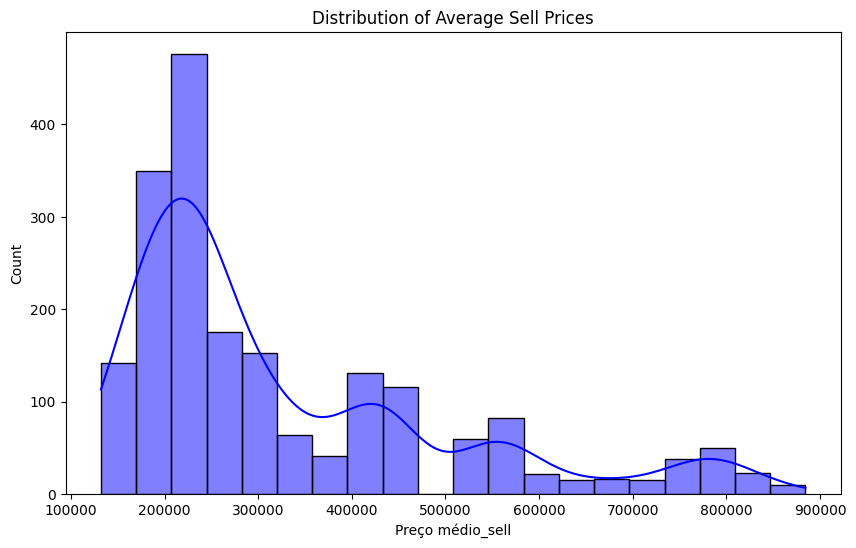

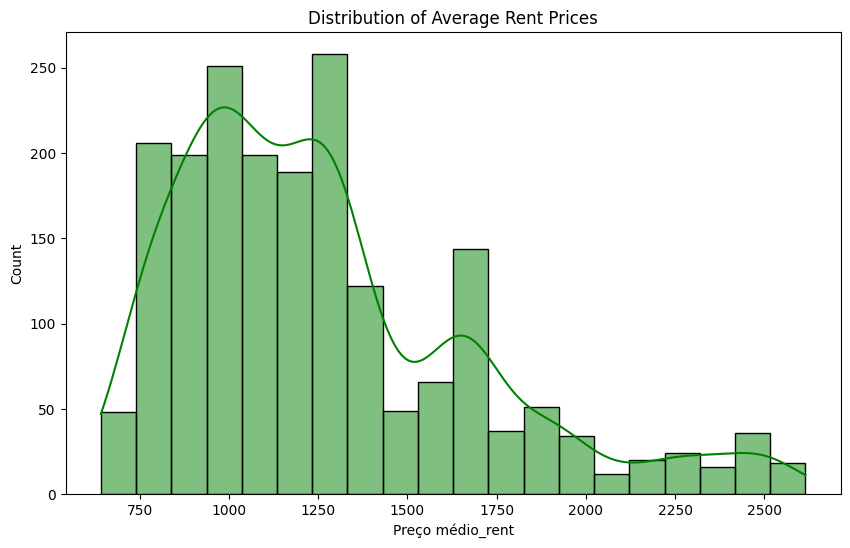

In [13]:
# Distribution of Sell and Rent Prices
plt.figure(figsize=(10, 6))
sns.histplot(df_dados['Preço médio_sell'], bins=20, color='blue', kde=True)
plt.title('Distribution of Average Sell Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_dados['Preço médio_rent'], bins=20, color='green', kde=True)
plt.title('Distribution of Average Rent Prices')
plt.show()

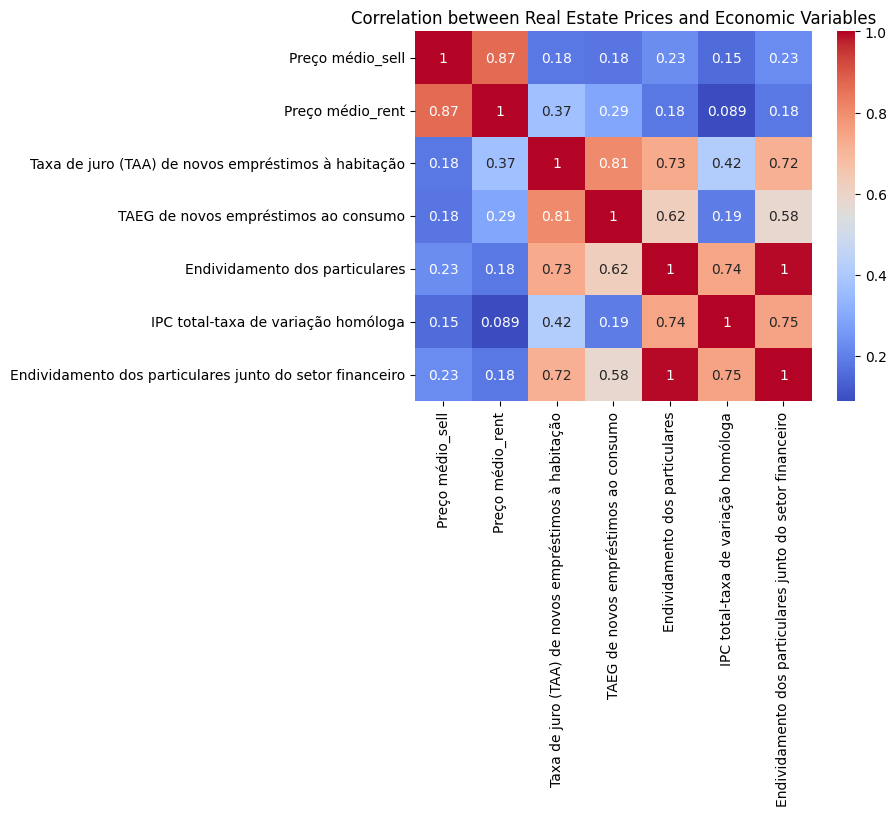

In [14]:
# Correlação entre preços de venda, aluguel e variáveis econômicas
economic_vars = ['Preço médio_sell', 'Preço médio_rent', 'Taxa de juro (TAA) de novos empréstimos à habitação', 
                 'TAEG de novos empréstimos ao consumo', 'Endividamento dos particulares', 
                 'IPC total-taxa de variação homóloga', 'Endividamento dos particulares junto do setor financeiro']
correlation_matrix = df_dados[economic_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Real Estate Prices and Economic Variables')
plt.show()


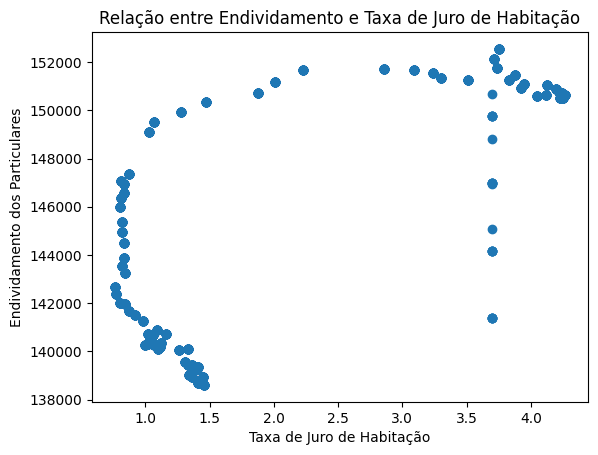

In [15]:
plt.scatter(df_dados['Taxa de juro (TAA) de novos empréstimos à habitação'], df_dados['Endividamento dos particulares'])
plt.title('Relação entre Endividamento e Taxa de Juro de Habitação')
plt.xlabel('Taxa de Juro de Habitação')
plt.ylabel('Endividamento dos Particulares')
plt.show()


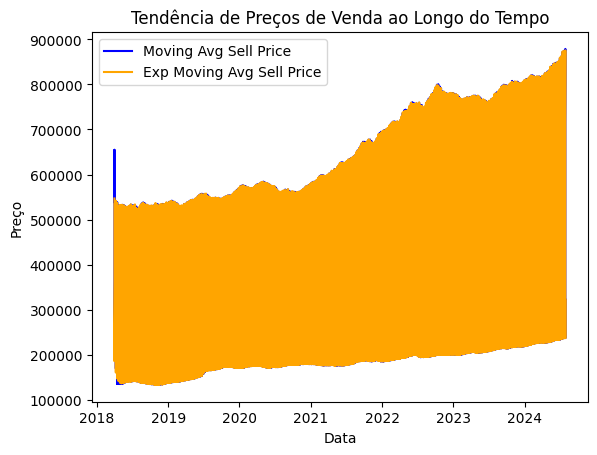

In [16]:
# Visualizar médias móveis dos preços de venda ao longo do tempo
plt.plot(df_dados['Date'], df_dados['moving_avg_price_sell'], label='Moving Avg Sell Price', color='blue')
plt.plot(df_dados['Date'], df_dados['exp_moving_avg_price_sell'], label='Exp Moving Avg Sell Price', color='orange')
plt.title('Tendência de Preços de Venda ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()


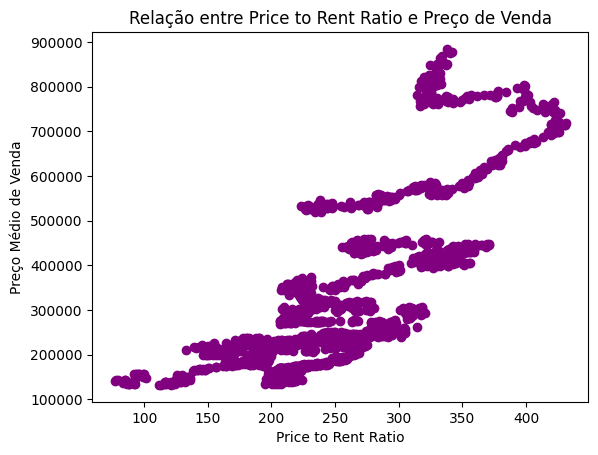

In [17]:
plt.scatter(df_dados['price_to_rent_ratio'], df_dados['Preço médio_sell'], color='purple')
plt.title('Relação entre Price to Rent Ratio e Preço de Venda')
plt.xlabel('Price to Rent Ratio')
plt.ylabel('Preço Médio de Venda')
plt.show()


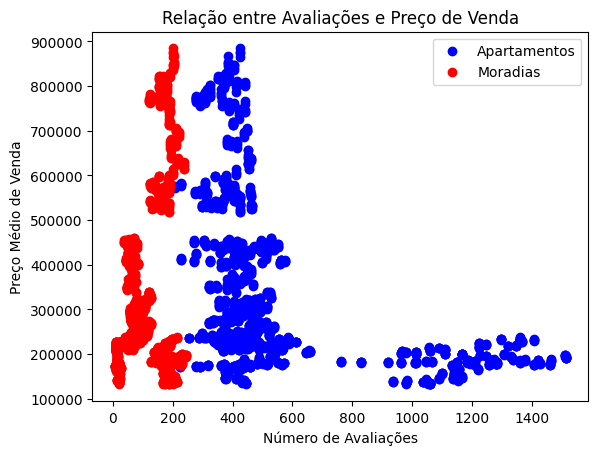

In [18]:
plt.scatter(df_dados['Avaliacoes Apartamentos'], df_dados['Preço médio_sell'], color='blue', label='Apartamentos')
plt.scatter(df_dados['Avaliacoes Moradias'], df_dados['Preço médio_sell'], color='red', label='Moradias')
plt.title('Relação entre Avaliações e Preço de Venda')
plt.xlabel('Número de Avaliações')
plt.ylabel('Preço Médio de Venda')
plt.legend()
plt.show()


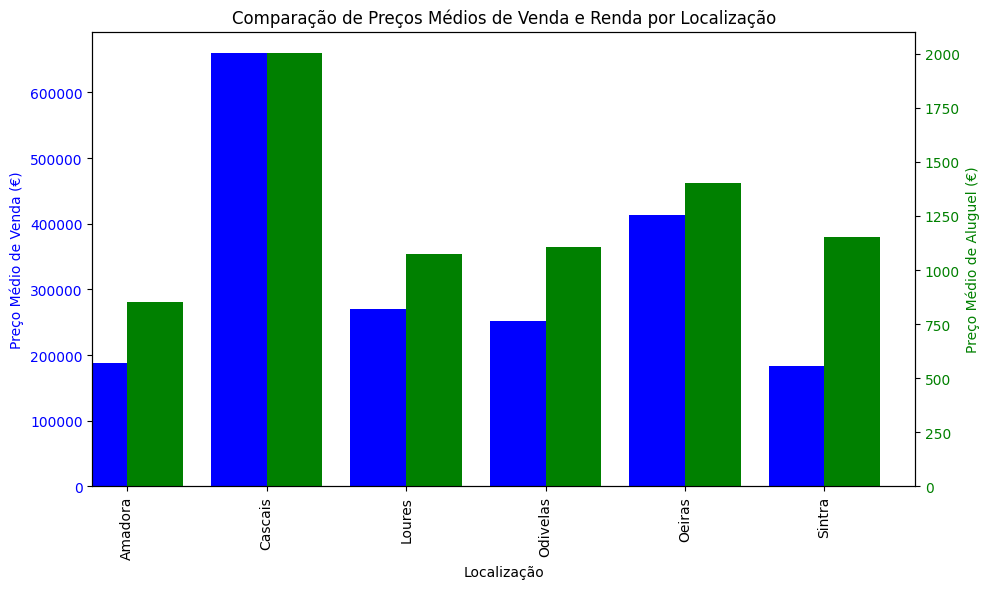

In [19]:
# Comparando os preços de venda por localizações
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar e calcular a média de preços por localização
location_avg_prices = df_dados.groupby('localizacao')[['Preço médio_sell', 'Preço médio_rent']].mean()

# Criar a figura e o eixo para o preço de venda
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar os preços médios de venda no eixo Y principal (azul)
location_avg_prices['Preço médio_sell'].plot(kind='bar', ax=ax1, color='blue', width=0.4, position=1, label='Preço médio de venda')
ax1.set_xlabel('Localização')
ax1.set_ylabel('Preço Médio de Venda (€)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo Y para os preços de aluguel
ax2 = ax1.twinx()
location_avg_prices['Preço médio_rent'].plot(kind='bar', ax=ax2, color='green', width=0.4, position=0, label='Preço médio de aluguel')
ax2.set_ylabel('Preço Médio de Aluguel (€)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e layout
plt.title('Comparação de Preços Médios de Venda e Renda por Localização')
fig.tight_layout()  # Ajusta o layout para evitar sobreposição de labels

# Exibir o gráfico
plt.show()



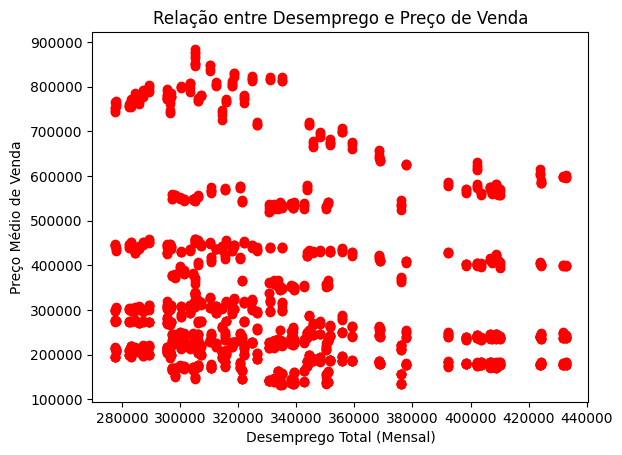

In [20]:
plt.scatter(df_dados['Desemprego registado no final do período-Total-Mensal'], df_dados['Preço médio_sell'], color='red')
plt.title('Relação entre Desemprego e Preço de Venda')
plt.xlabel('Desemprego Total (Mensal)')
plt.ylabel('Preço Médio de Venda')
plt.show()


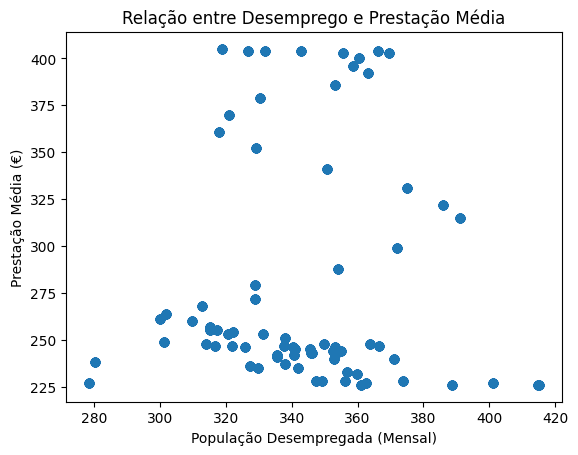

In [21]:
plt.scatter(df_dados['População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) '], df_dados['Prestacao Media'])
plt.title('Relação entre Desemprego e Prestação Média')
plt.xlabel('População Desempregada (Mensal)')
plt.ylabel('Prestação Média (€)')
plt.show()


In [22]:
# Análise de Tendências de Preços ao Longo do Tempo
# Comparação entre Localizações
# Análise de Correlação entre Variáveis Econômicas e Imobiliárias
# Relação entre Subida/Redução de Preços e Fatores Econômicos
# Análise de Sustentabilidade dos Preços: Price-to-Rent Ratio
# Impacto das Taxas de Juro nos Preços Imobiliários
# Análise de Séries Temporais para Previsão de Preços Imobiliários
# Análise da Sazonalidade nos Preços
# Análise de Outliers no Mercado Imobiliário
#  Impacto da População Desempregada nos Preços de Imóveis



<Axes: xlabel='localizacao', ylabel='Preço médio_sell'>

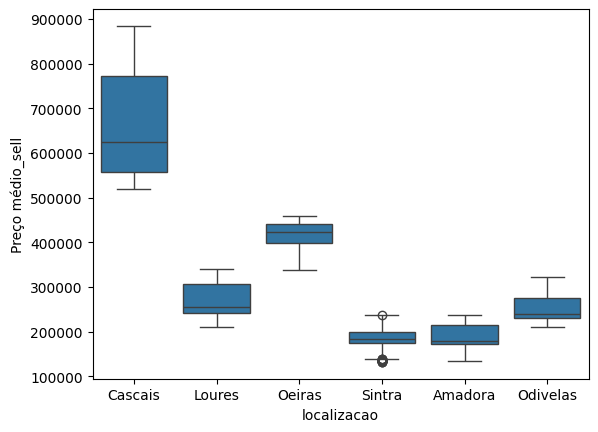

In [23]:
# Comparação entre localizações usando Boxplots
sns.boxplot(x='localizacao', y='Preço médio_sell', data=df_dados)


In [24]:
df_dados.columns

Index(['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
       'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado',
       'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
       'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano', '1 mês (Euribor)',
       '3 meses (Euribor)', '6 meses (Euribor)', '12 meses (Euribor)',
       'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
       'Indicador coincidente para a atividade económica-Mensal-TVH',
       'Indicador coincidente para o consumo privado-Mensal-TVH',
       'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
       'Endividamento dos particulares junto de empresas não financeiras',
       'Endividamento dos particulares junto do setor financeiro',
       'Endividamento dos particulares junto das administrações públicas',
       'Endividamento dos parti

<Axes: >

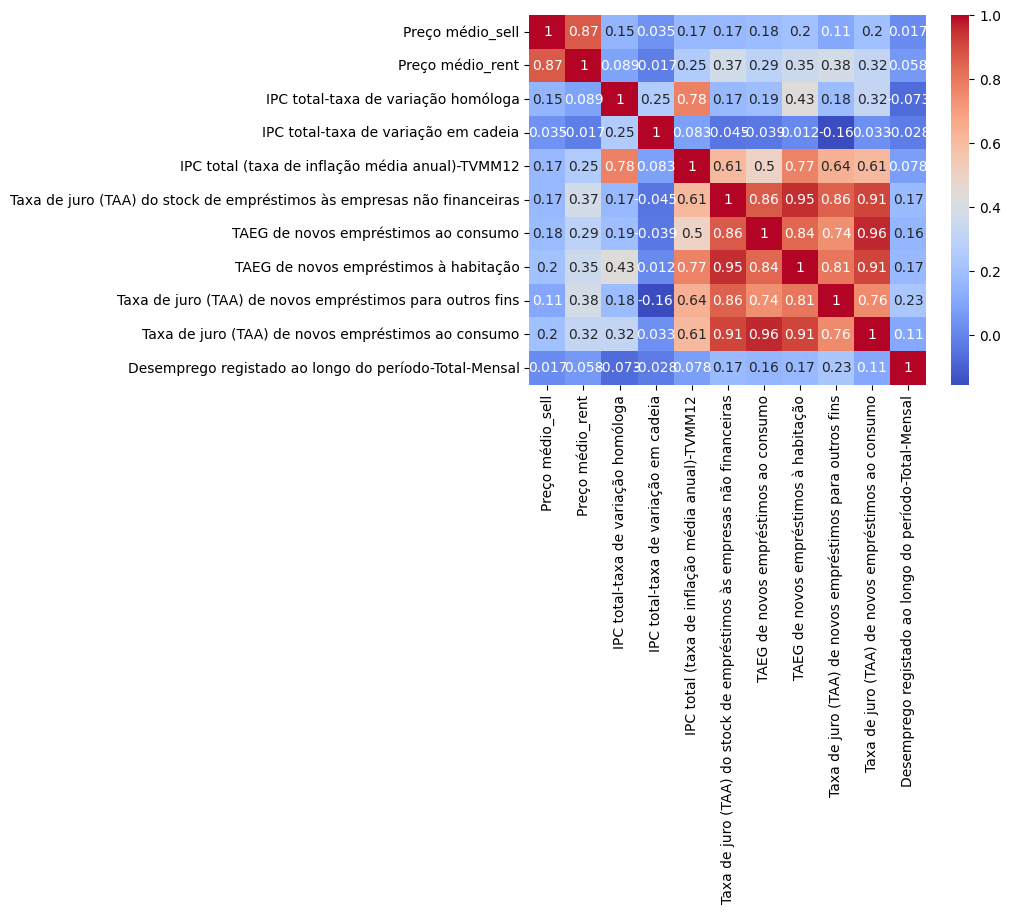

In [25]:
# Análise de correlação entre variáveis econômicas e preços de venda/aluguel
economic_vars = ['Preço médio_sell', 'Preço médio_rent', 
                 'IPC total-taxa de variação homóloga',
       'IPC total-taxa de variação em cadeia',
       'IPC total (taxa de inflação média anual)-TVMM12',
       'Taxa de juro (TAA) do stock de empréstimos às empresas não financeiras',
       'TAEG de novos empréstimos ao consumo',
       'TAEG de novos empréstimos à habitação',
       'Taxa de juro (TAA) de novos empréstimos para outros fins',
       'Taxa de juro (TAA) de novos empréstimos ao consumo', 
       'Desemprego registado ao longo do período-Total-Mensal']
correlation_matrix = df_dados[economic_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



<Axes: xlabel='TAEG de novos empréstimos ao consumo', ylabel='Preço médio_sell'>

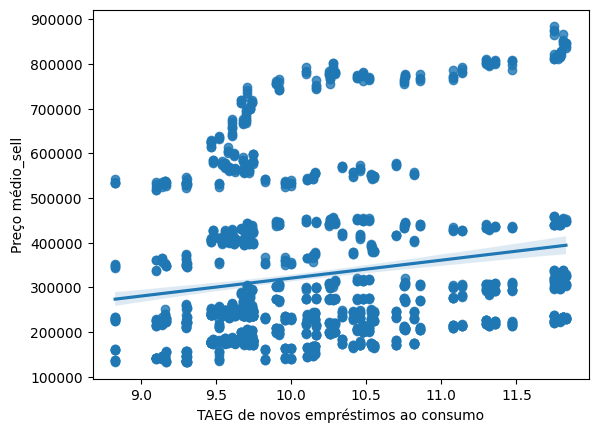

In [26]:
# Gráfico de dispersão mostrando o impacto das taxas de juros nos preços de venda
sns.regplot(x='TAEG de novos empréstimos ao consumo', y='Preço médio_sell', data=df_dados)

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_dados['Preço médio_sell'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

c:\Users\ruben\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\ruben\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\ruben\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

c:\Users\ruben\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is

In [28]:
df_dados.columns

Index(['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
       'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado',
       'População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2) ',
       'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano', '1 mês (Euribor)',
       '3 meses (Euribor)', '6 meses (Euribor)', '12 meses (Euribor)',
       'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
       'Indicador coincidente para a atividade económica-Mensal-TVH',
       'Indicador coincidente para o consumo privado-Mensal-TVH',
       'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
       'Endividamento dos particulares junto de empresas não financeiras',
       'Endividamento dos particulares junto do setor financeiro',
       'Endividamento dos particulares junto das administrações públicas',
       'Endividamento dos parti

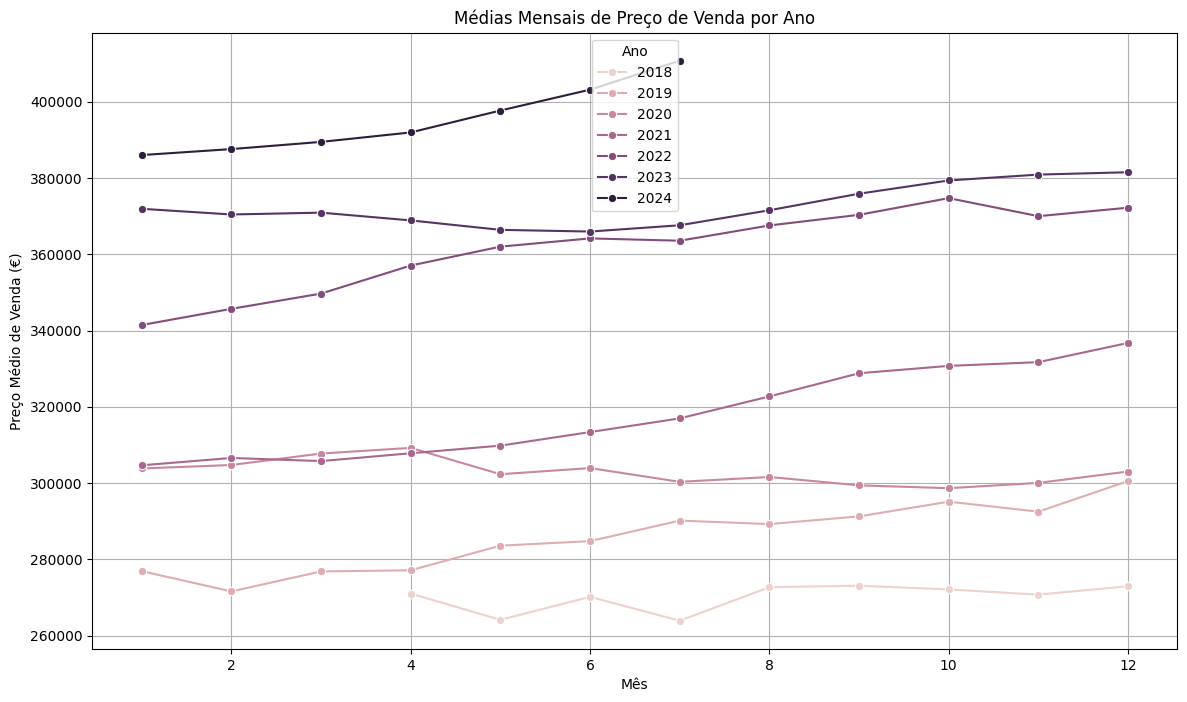

In [29]:
# Comparação de preços por mês para identificar sazonalidade
import matplotlib.pyplot as plt
import seaborn as sns

# Converter a coluna 'Date' para datetime se ainda não estiver
df_dados['Date'] = pd.to_datetime(df_dados['Date'], format='%Y%m%d')

# Extrair mês e ano
df_dados['Mês'] = df_dados['Date'].dt.month
df_dados['Ano'] = df_dados['Date'].dt.year

# Agrupar e calcular as médias de preços de venda e aluguel por mês e ano
monthly_avg = df_dados.groupby(['Ano', 'Mês'])[['Preço médio_sell', 'Preço médio_rent']].mean().reset_index()

# Plotar as médias mensais de preços ao longo dos anos
plt.figure(figsize=(14, 8))
sns.lineplot(x='Mês', y='Preço médio_sell', hue='Ano', data=monthly_avg, marker='o')
plt.title('Médias Mensais de Preço de Venda por Ano')
plt.xlabel('Mês')
plt.ylabel('Preço Médio de Venda (€)')
plt.grid(True)
plt.show()



In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

# Definir o tamanho do gráfico
plt.figure(figsize=(14, 8))

# Plotar as variações percentuais de preço de venda ao longo do tempo
sns.lineplot(x='Date', y='Variação preço venda', hue='localizacao', data=df_dados, marker='o', palette='tab10')
plt.title('Variação Percentual de Preço de Venda por Localização')
plt.xlabel('Data')
plt.ylabel('Variação Percentual de Preço de Venda (%)')
plt.grid(True)
plt.legend(title='Localização', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Criar um segundo gráfico para as variações percentuais de preço de aluguel
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Variação preço aluguel', hue='localizacao', data=df_dados, marker='o', palette='tab10')
plt.title('Variação Percentual de Preço de Aluguel por Localização')
plt.xlabel('Data')
plt.ylabel('Variação Percentual de Preço de Aluguel (%)')
plt.grid(True)
plt.legend(title='Localização', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



ValueError: Could not interpret value `Variação preço venda` for `y`. An entry with this name does not appear in `data`.

<Figure size 1400x800 with 0 Axes>

C:\Users\ruben\AppData\Local\Temp\ipykernel_5548\1422294834.py:5: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



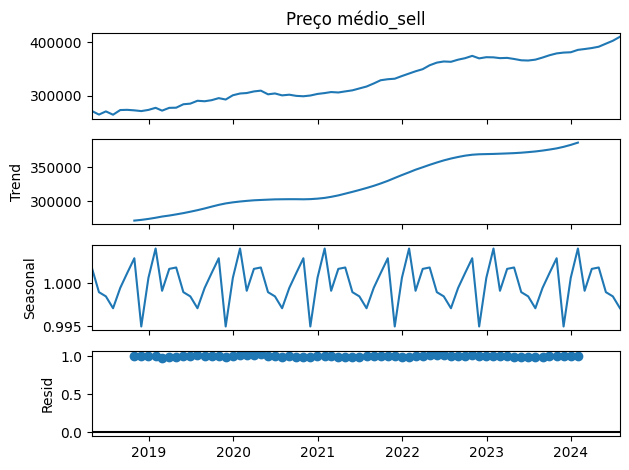

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Definir a série temporal de preços de venda
# df_dados.set_index('Date', inplace=True)
price_series = df_dados['Preço médio_sell'].resample('M').mean()  # Resample para mensal

# Aplicar a decomposição sazonal
decomposition = seasonal_decompose(price_series, model='multiplicative', period=12)

# Plotar a decomposição
decomposition.plot()
plt.show()


C:\Users\ruben\AppData\Local\Temp\ipykernel_5548\2724060492.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

c:\Users\ruben\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



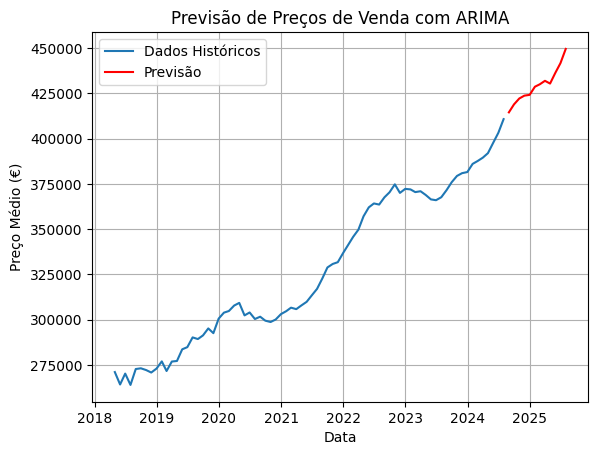

In [37]:
from statsmodels.tsa.arima.model import ARIMA

# Definir a série temporal de preços de venda
price_series = df_dados['Preço médio_sell'].resample('M').mean()  # Resample para mensal

# Ajustar o modelo ARIMA com sazonalidade
model = ARIMA(price_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Fazer a previsão para os próximos 12 meses
forecast = model_fit.forecast(steps=12)

# Plotar os dados históricos e a previsão
plt.plot(price_series, label='Dados Históricos')
plt.plot(forecast, label='Previsão', color='red')
plt.title('Previsão de Preços de Venda com ARIMA')
plt.xlabel('Data')
plt.ylabel('Preço Médio (€)')
plt.legend()
plt.grid(True)
plt.show()


#### Separacao dos dados- grafico

In [80]:
import numpy as np
df = pd.read_csv('../../regioes/dadosFinais.csv', sep=';')
# df = pd.read_json('../../regioes/DataSite/dadosFinais.json')


df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')

# df = df.sort_values(by=['Data', 'codLocation'])

locationD = pd.read_json('../../regioes/DataSite/localizacao.json', typ='series')
df['codLocation'] = df['codLocation'].astype(str)
df['localizacao'] = df['codLocation'].map(locationD)

df.head()

Avaliacoes Total  Avaliacoes Apartamentos  Avaliacoes Moradias  \
0               586                      426                160.0   
1               586                      426                160.0   
2               586                      426                160.0   
3               586                      426                160.0   
4               586                      426                160.0   

   Capital Divida Total  Capital Divida 3M  Capital Divida 6M  \
0                 51817              97727              95476   
1                 51817              97727              95476   
2                 51817              97727              95476   
3                 51817              97727              95476   
4                 51817              97727              95476   

   Capital Divida 12M  Juros Totais  Capital Amortizado  \
0             94260.0            44                 196   
1             94260.0            44                 196   
2             94260.0            44                 196   
3             94260.0            44                 196   
4             94260.0            44                 196   

   População desempregada com idade entre 16 e 74 anos (N.º) por Grupo etário; Mensal (2)   \
0                                              371.2                                         
1                                              371.2                                         
2                                              371.2                                         
3                                              371.2                                         
4                                              371.2                                         

   ...  moving_avg_price_sell  exp_moving_avg_price_sell  price_to_rent_ratio  \
0  ...          538727.333333                546758.0000           237.927763   
1  ...          538727.333333                541697.5000           236.195863   
2  ...          538727.333333                537242.2500           227.395220   
3  ...          531040.666667                530470.1250           227.200868   
4  ...          530255.333333                532375.5625           228.716182   

   propriedades_unicas_rent  propriedades_unicas_sell  moving_avg_price_rent  \
0                      -1.0                      -5.0            2304.333333   
1                      20.0                       8.0            2304.333333   
2                      -4.0                       1.0            2304.333333   
3                      -6.0                       0.0            2306.666667   
4                       3.0                      -4.0            2328.000000   

   exp_moving_avg_price_rent  moving_avg_Reducao_sell  \
0                    2298.00                10.333333   
1                    2285.00                10.333333   
2                    2314.00                10.333333   
3                    2309.50                11.000000   
4                    2322.75                11.000000   

   moving_avg_Reducao_rent  localizacao  
0                 2.666667      Cascais  
1                 2.666667      Cascais  
2                 2.666667      Cascais  
3                 4.000000      Cascais  
4                 4.000000      Cascais  

[5 rows x 79 columns]

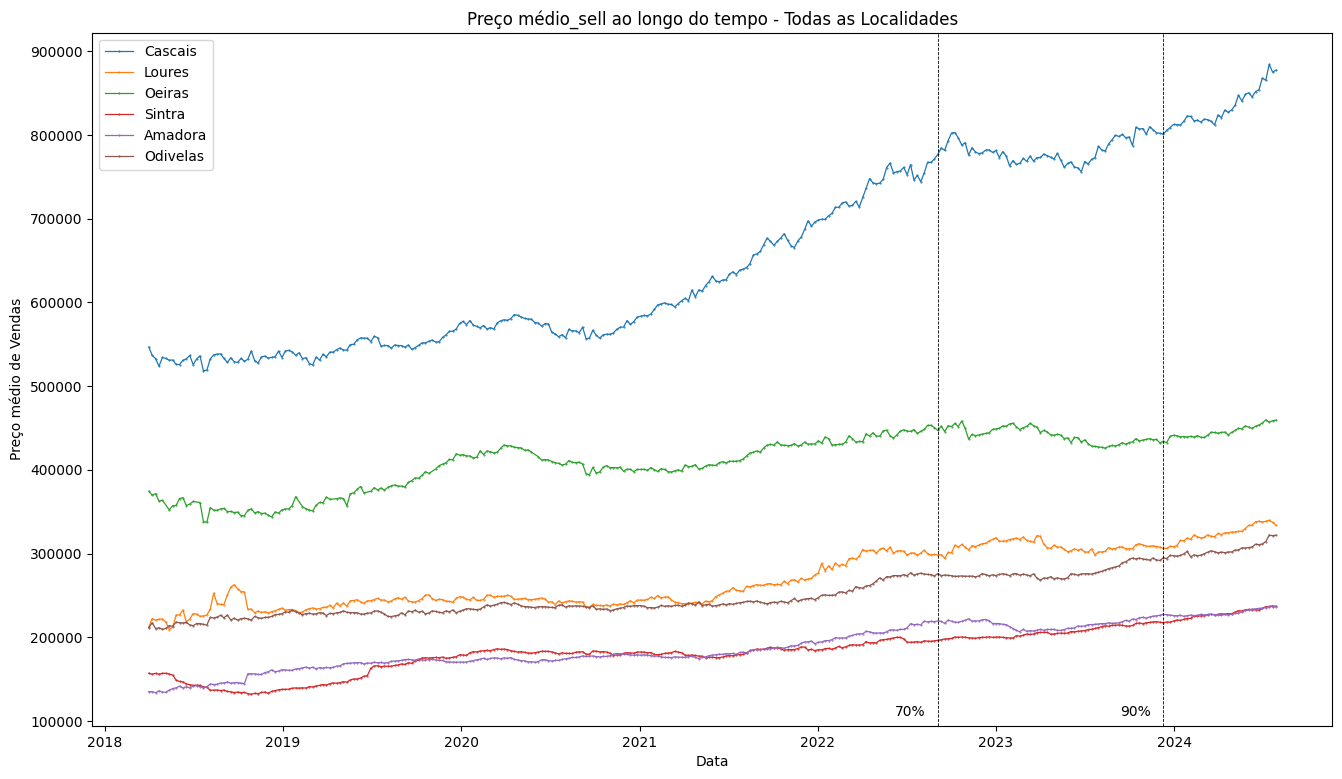

In [92]:
plt.figure(figsize=(16, 9))

localidades = df['localizacao'].unique()

colors = plt.get_cmap('tab10').colors 
colors = colors * (len(localidades) // len(colors) + 1)

for i, local in enumerate(localidades):
    df_local = df[df['localizacao'] == local]
    
    plt.plot(df_local['Date'], df_local['Preço médio_sell'], label=f"{local}", 
             color=colors[i], marker='.', markersize=1, linewidth=0.9)
    

total_size = len(df['Date'].unique())
train_end = int(0.7 * total_size)
test_end = int(0.9 * total_size)
datas_unicas = df['Date'].unique()

plt.axvline(datas_unicas[train_end], color='black', linewidth=0.6, linestyle='--')
plt.text(datas_unicas[train_end] - pd.Timedelta(days=25),  
         plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.01, 
         '70%', color='black', verticalalignment='bottom', horizontalalignment='right')

plt.axvline(datas_unicas[test_end], color='black', linewidth=0.6, linestyle='--')
plt.text(datas_unicas[test_end] - pd.Timedelta(days=25),  
         plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.01,  
         '90%', color='black', verticalalignment='bottom', horizontalalignment='right')

plt.title("Preço médio das localidades ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Preço médio de Vendas")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Split metodos

In [13]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df = pd.read_csv('../../regioes/dadosFinais.csv', sep=';')
# df = pd.read_json('../../regioes/DataSite/dadosFinais.json')


df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d', errors='coerce')

# df = df.sort_values(by=['Data', 'codLocation'])

locationD = pd.read_json('../../regioes/DataSite/localizacao.json', typ='series')
df['codLocation'] = df['codLocation'].astype(str)
df['localizacao'] = df['codLocation'].map(locationD)
df.head()

Avaliacoes Total  Avaliacoes Apartamentos  Avaliacoes Moradias  \
0               586                      426                160.0   
1               586                      426                160.0   
2               586                      426                160.0   
3               586                      426                160.0   
4               586                      426                160.0   

   Capital Divida Total  Capital Divida 3M  Capital Divida 6M  \
0                 51817              97727              95476   
1                 51817              97727              95476   
2                 51817              97727              95476   
3                 51817              97727              95476   
4                 51817              97727              95476   

   Capital Divida 12M  Juros Totais  Capital Amortizado  \
0             94260.0            44                 196   
1             94260.0            44                 196   
2             94260.0            44                 196   
3             94260.0            44                 196   
4             94260.0            44                 196   

   Unemployed population  ...  moving_avg_price_sell  \
0                  371.2  ...          538727.333333   
1                  371.2  ...          538727.333333   
2                  371.2  ...          538727.333333   
3                  371.2  ...          531040.666667   
4                  371.2  ...          530255.333333   

   exp_moving_avg_price_sell  price_to_rent_ratio  propriedades_unicas_rent  \
0                546758.0000           237.927763                      -1.0   
1                541697.5000           236.195863                      20.0   
2                537242.2500           227.395220                      -4.0   
3                530470.1250           227.200868                      -6.0   
4                532375.5625           228.716182                       3.0   

   propriedades_unicas_sell  moving_avg_price_rent  exp_moving_avg_price_rent  \
0                      -5.0            2304.333333                    2298.00   
1                       8.0            2304.333333                    2285.00   
2                       1.0            2304.333333                    2314.00   
3                       0.0            2306.666667                    2309.50   
4                      -4.0            2328.000000                    2322.75   

   moving_avg_Reducao_sell  moving_avg_Reducao_rent  localizacao  
0                10.333333                 2.666667      Cascais  
1                10.333333                 2.666667      Cascais  
2                10.333333                 2.666667      Cascais  
3                11.000000                 4.000000      Cascais  
4                11.000000                 4.000000      Cascais  

[5 rows x 79 columns]

C:\Users\ruben\AppData\Local\Temp\ipykernel_15364\1880478250.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local['Preço médio_sell_scaled'] = scaler.fit_transform(df_local[['Preço médio_sell']])
C:\Users\ruben\AppData\Local\Temp\ipykernel_15364\1880478250.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local['Preço médio_sell_scaled'] = scaler.fit_transform(df_local[['Preço médio_sell']])
C:\Users\ruben\AppData\Local\Temp\ipykernel_15364\1880478250.py:26: SettingWithCopyWarning: 
A value i

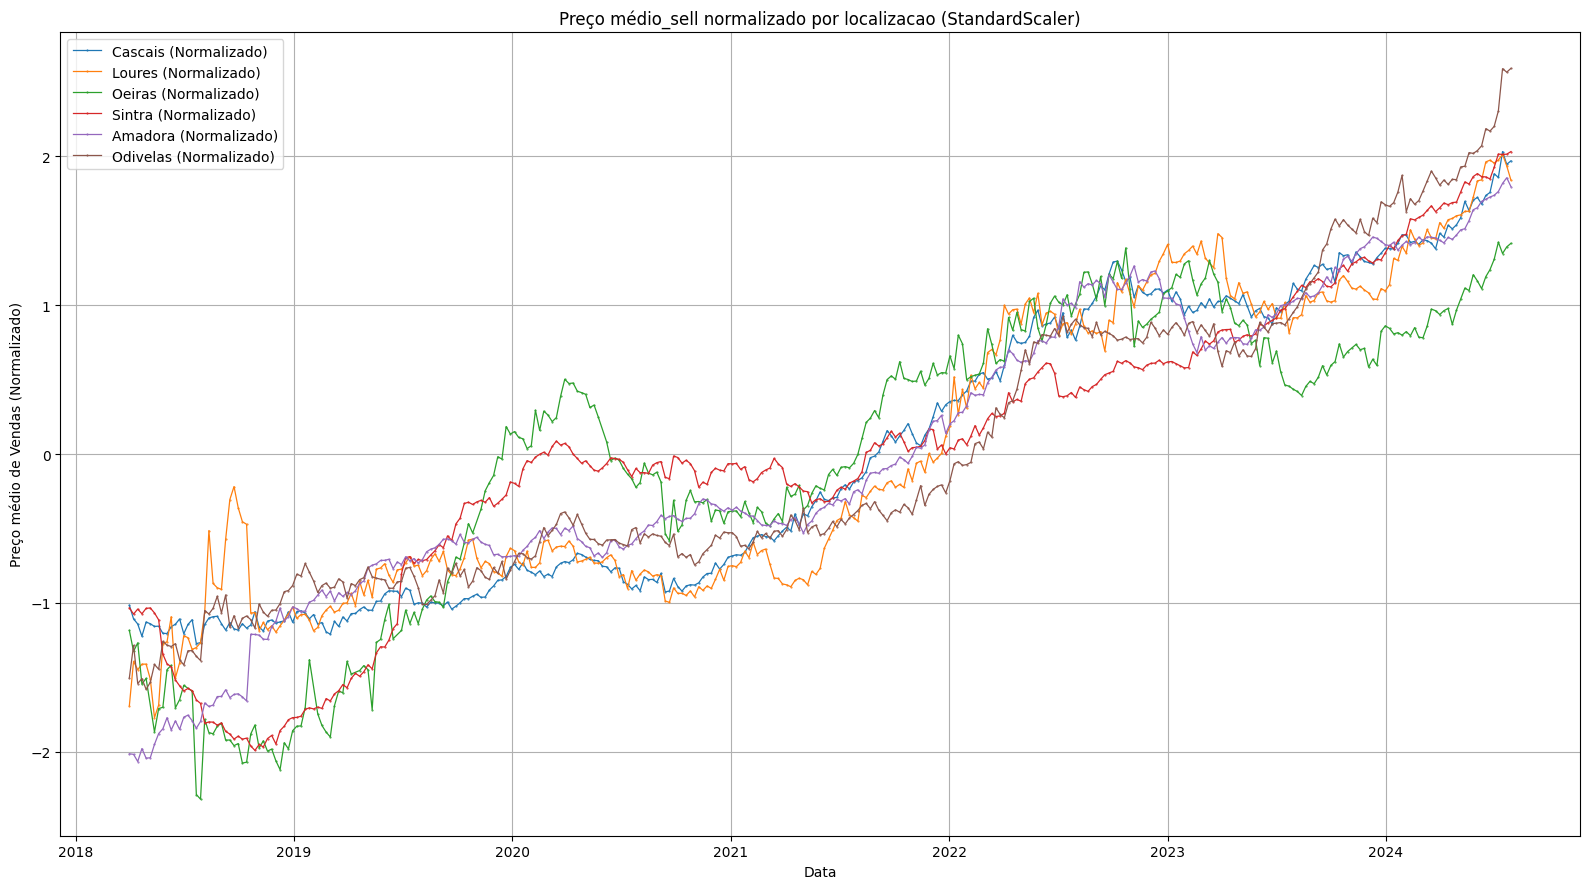

In [16]:
# Excluir entradas com valores de data inválidos (caso existam)
df = df.dropna(subset=['Date'])

# Separar a variável dependente (Preço médio_sell)
y = df['Preço médio_sell'].values.reshape(-1, 1)

# Aplicar o StandardScaler à variável Preço médio_sell
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)

# Adicionar a coluna de Preço médio_sell normalizado ao dataframe original para visualização
df['Preço médio_sell_scaled'] = y_scaled

# Definir paleta de cores
colors = plt.get_cmap('tab10').colors
colors = colors * (len(localidades) // len(colors) + 1)


plt.figure(figsize=(16, 9))

# Aplicar a normalização e plotar os dados por localidade
for i, local in enumerate(localidades):
    df_local = df[df['localizacao'] == local]
    
    # Normalizar Preço médio_sell para cada localidade
    df_local['Preço médio_sell_scaled'] = scaler.fit_transform(df_local[['Preço médio_sell']])
    
    # Plotar os dados normalizados para cada localidade
    plt.plot(df_local['Date'], df_local['Preço médio_sell_scaled'], label=f"{local} (Normalizado)", 
             color=colors[i], marker='.', markersize=1, linewidth=0.9)

# Configurações do gráfico
plt.title("Preço médio_sell normalizado por localizacao (StandardScaler)")
plt.xlabel("Data")
plt.ylabel("Preço médio de Vendas (Normalizado)")
# plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()

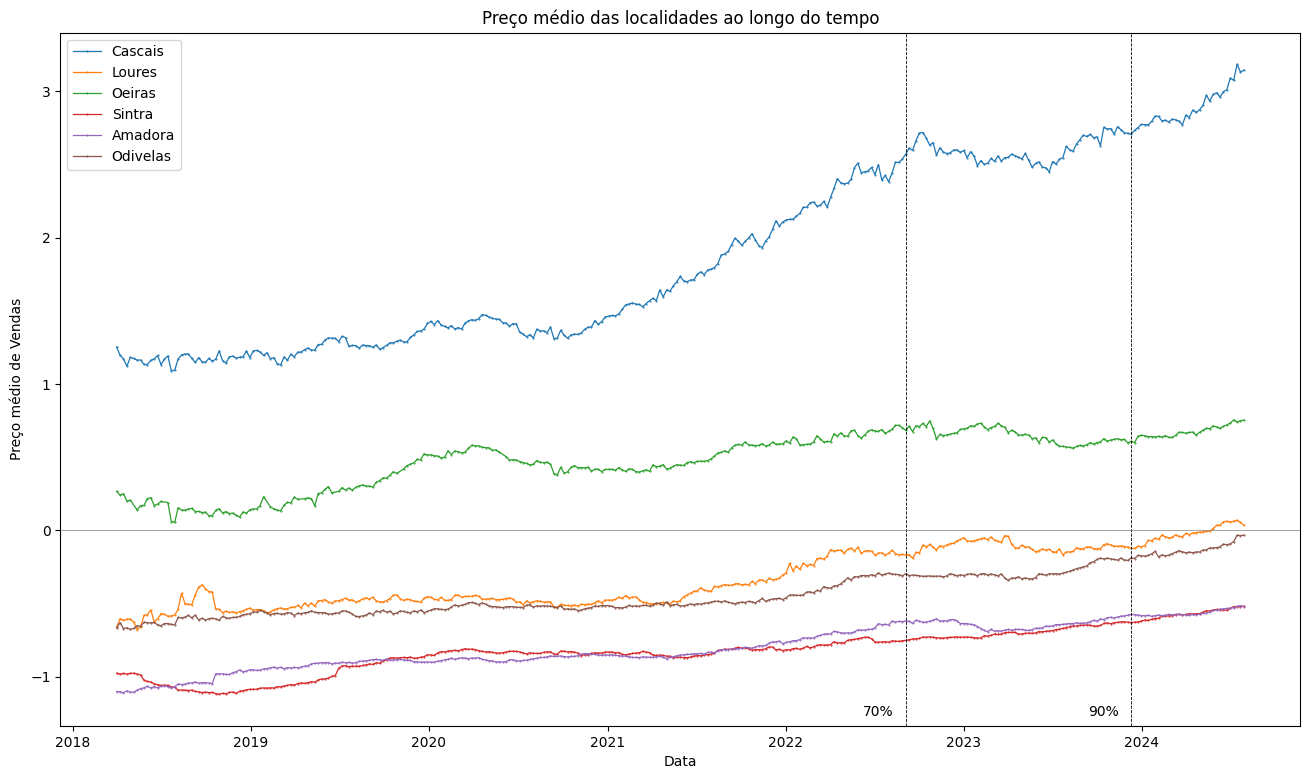

In [19]:
plt.figure(figsize=(16, 9))

localidades = df['localizacao'].unique()

colors = plt.get_cmap('tab10').colors 
colors = colors * (len(localidades) // len(colors) + 1)

for i, local in enumerate(localidades):
    df_local = df[df['localizacao'] == local]
    
    plt.plot(df_local['Date'], df_local['Preço médio_sell_scaled'], label=f"{local}", 
             color=colors[i], marker='.', markersize=1, linewidth=0.9)
    

total_size = len(df['Date'].unique())
train_end = int(0.7 * total_size)
test_end = int(0.9 * total_size)
datas_unicas = df['Date'].unique()

plt.axvline(datas_unicas[train_end], color='black', linewidth=0.6, linestyle='--')
plt.text(datas_unicas[train_end] - pd.Timedelta(days=25),  
         plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.01, 
         '70%', color='black', verticalalignment='bottom', horizontalalignment='right')

plt.axvline(datas_unicas[test_end], color='black', linewidth=0.6, linestyle='--')
plt.text(datas_unicas[test_end] - pd.Timedelta(days=25),  
         plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.01,  
         '90%', color='black', verticalalignment='bottom', horizontalalignment='right')

plt.axhline(0, color='gray', linewidth=0.5, linestyle='-')


plt.title("Preço médio das localidades ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Preço médio de Vendas")
plt.legend(loc='upper left')
# plt.grid(True)
plt.show()

C:\Users\ruben\AppData\Local\Temp\ipykernel_15364\2026099562.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local['Preço médio_sell_scaled'] = scaler_minmax.fit_transform(df_local[['Preço médio_sell']])
C:\Users\ruben\AppData\Local\Temp\ipykernel_15364\2026099562.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_local['Preço médio_sell_scaled'] = scaler_minmax.fit_transform(df_local[['Preço médio_sell']])
C:\Users\ruben\AppData\Local\Temp\ipykernel_15364\2026099562.py:11: SettingWithCopyWarni

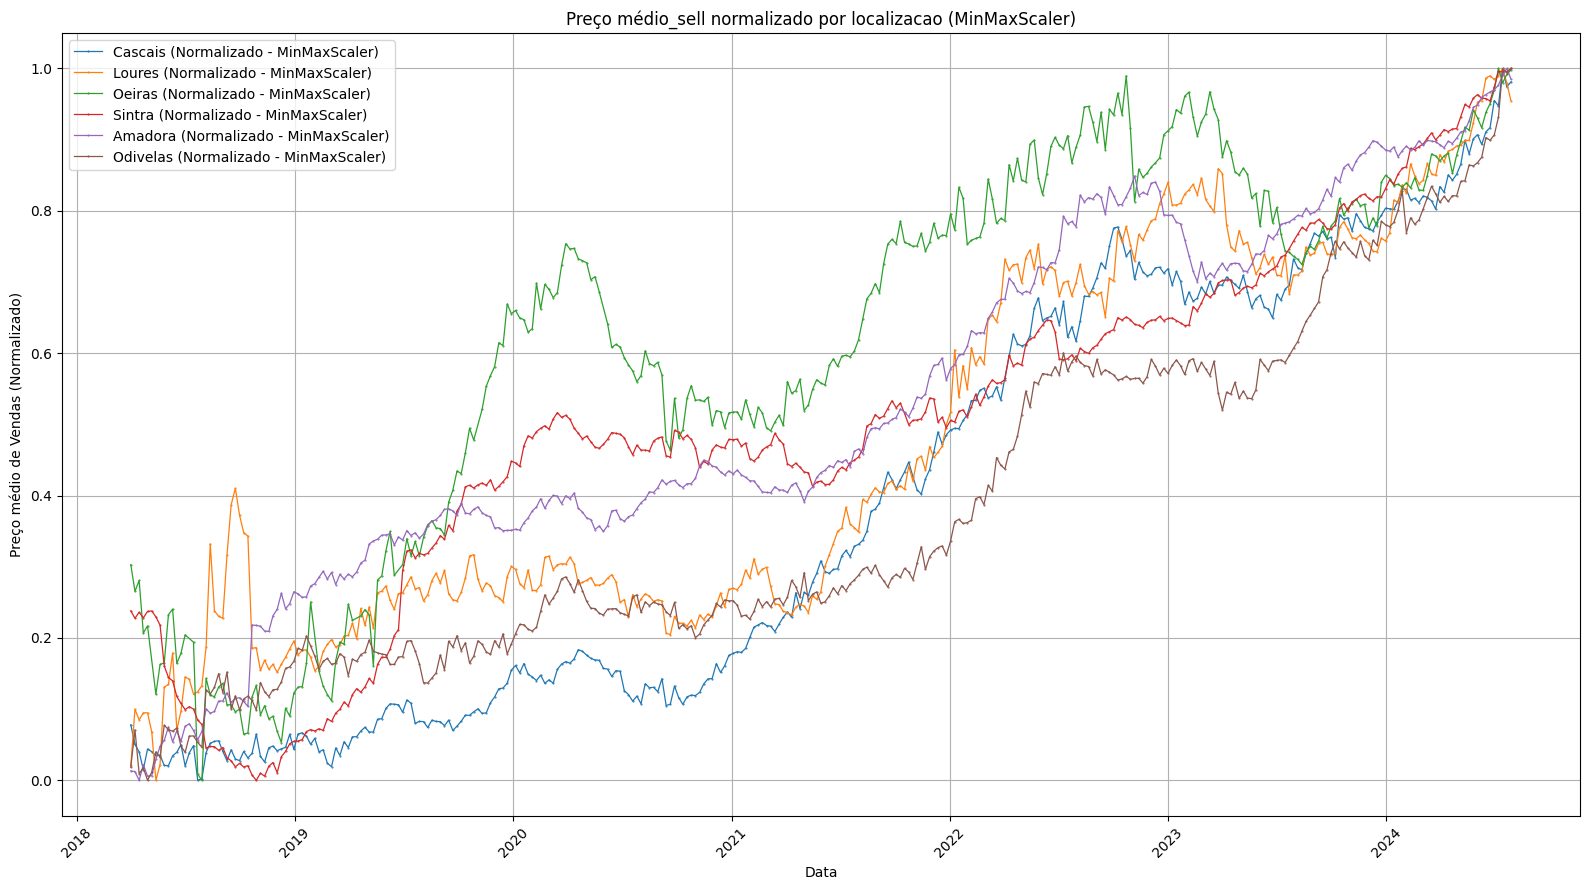

In [15]:
# Normalização usando MinMaxScaler
scaler_minmax = MinMaxScaler()

plt.figure(figsize=(16, 9))

# Aplicar a normalização e plotar os dados por localidade usando MinMaxScaler
for i, local in enumerate(localidades):
    df_local = df[df['localizacao'] == local]
    
    # Normalizar Preço médio_sell para cada localidade usando MinMaxScaler
    df_local['Preço médio_sell_scaled'] = scaler_minmax.fit_transform(df_local[['Preço médio_sell']])
    
    # Plotar os dados normalizados para cada localidade
    plt.plot(df_local['Date'], df_local['Preço médio_sell_scaled'], label=f"{local} (Normalizado - MinMaxScaler)", 
             color=colors[i], marker='.', markersize=1, linewidth=0.9)

# Configurações do gráfico para MinMaxScaler
plt.title("Preço médio_sell normalizado por localizacao (MinMaxScaler)")
plt.xlabel("Data")
plt.ylabel("Preço médio de Vendas (Normalizado)")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico para MinMaxScaler
plt.show()

### TimeSeriesSplit

In [20]:
df = pd.read_csv('../../regioes/dadosFinais.csv', sep=';')
print(df.columns)
print(df['codLocation'].unique())

local = 1711115
df = df[df['codLocation'] == local]
df.head()

# Separar variáveis independentes (X) e dependente (y)
X = df.drop(columns=['Preço médio_sell'])

# y = df[['Date','Preço médio_sell']]
y = df['Preço médio_sell'] # drop the m2

train_size = 0.7
test_size = 0.2
valid_size = 0.1

total_size = len(df)
train_end = int(train_size * total_size)
test_end = int((train_size + test_size) * total_size)

X_train = X.iloc[:train_end]
X_test = X.iloc[train_end:test_end]
X_valid = X.iloc[test_end:]

y_train = y.iloc[:train_end]
y_test = y.iloc[train_end:test_end]
y_valid = y.iloc[test_end:]


print(f"Tamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")
print(f"Tamanho do conjunto de validação: {len(X_valid)}")


Index(['Avaliacoes Total', 'Avaliacoes Apartamentos', 'Avaliacoes Moradias',
       'Capital Divida Total', 'Capital Divida 3M', 'Capital Divida 6M',
       'Capital Divida 12M', 'Juros Totais', 'Capital Amortizado',
       'Unemployed population', 'Prestacao Media', 'Mês', 'Ano', 'mes', 'ano',
       '1 mês (Euribor)', '3 meses (Euribor)', '6 meses (Euribor)',
       '12 meses (Euribor)',
       'Número de beneficiários de subsídio de desemprego (milhares)-mensal',
       'Indicador coincidente para a atividade económica-Mensal-TVH',
       'Indicador coincidente para o consumo privado-Mensal-TVH',
       'Endividamento dos particulares-TVA', 'Endividamento dos particulares',
       'Endividamento dos particulares junto de empresas não financeiras',
       'Endividamento dos particulares junto do setor financeiro',
       'Endividamento dos particulares junto das administrações públicas',
       'Endividamento dos particulares junto de particulares',
       'Endividamento dos particul

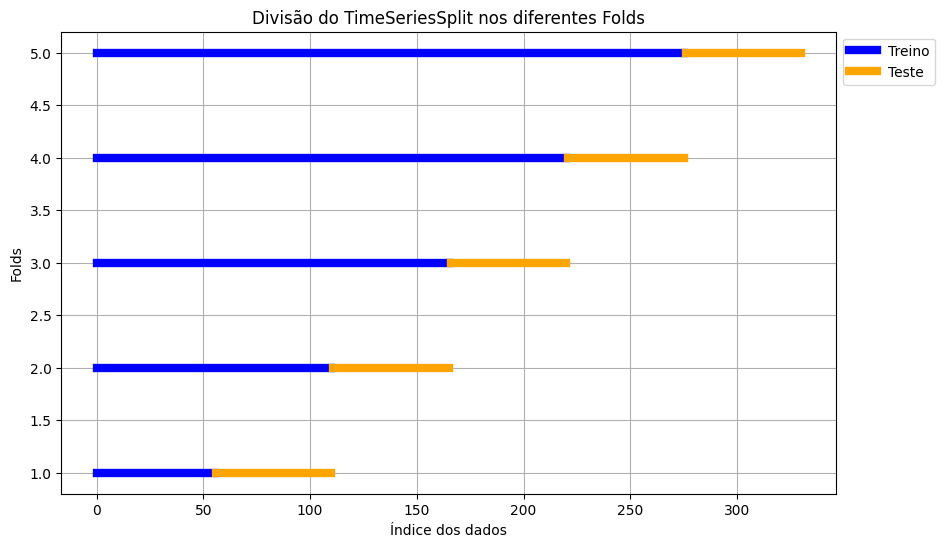

In [23]:
from sklearn.model_selection import TimeSeriesSplit

# Separar variáveis independentes (X) e dependente (y)
X = df.drop(columns=['Preço médio_sell'])
y = df['Preço médio_sell']

# Inicializar o TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Configurar o gráfico
plt.figure(figsize=(10, 6))
fold = 0

# Iterar pelos splits e plotar sem repetição de legendas
for train_index, test_index in tscv.split(X):
    fold += 1
    # Visualizar a parte de treino
    plt.plot(train_index, [fold] * len(train_index), color='blue', lw=6, label='Treino' if fold == 1 else "")
    # Visualizar a parte de teste
    plt.plot(test_index, [fold] * len(test_index), color='orange', lw=6, label='Teste' if fold == 1 else "")

# Ajustes de título, eixos e legenda
plt.title("Divisão do TimeSeriesSplit nos diferentes Folds")
plt.xlabel("Índice dos dados")
plt.ylabel("Folds")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

In [8]:
# Obter localidades únicas
localidades = df['localizacao'].unique()

# Definir paleta de cores
colors = plt.get_cmap('tab10').colors
colors = colors * (len(localidades) // len(colors) + 1)

# StandardScaler
scaler = StandardScaler()

# Aplicar o StandardScaler e plotar os dados escalados para cada localidade
for i, local in enumerate(localidades):
    df_local = df[df['localizacao'] == local]
    
    # Escalar o Preço médio_sell para cada localidade
    df_local_scaled = df_local.copy()
    df_local_scaled['Preço médio_sell_scaled'] = scaler.fit_transform(df_local[['Preço médio_sell']])
    
    # Plotar os dados originais e escalados
    plt.plot(df_local['Date'], df_local['Preço médio_sell_scaled'], label=f"{local} (Escalado)", 
             color=colors[i], marker='.', markersize=1, linewidth=0.9)


KeyError: 'Preço médio_sell_scaled'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Carregar os dados
df = pd.read_csv('../../regioes/dadosFinais.csv', sep=';')

# Configurar o gráfico
plt.figure(figsize=(16, 9))

# Obter localidades únicas
localidades = df['localizacao'].unique()

# Definir paleta de cores
colors = plt.get_cmap('tab10').colors
colors = colors * (len(localidades) // len(colors) + 1)

# StandardScaler
scaler = StandardScaler()

# Aplicar o StandardScaler e plotar os dados escalados para cada localidade
for i, local in enumerate(localidades):
    df_local = df[df['localizacao'] == local]
    
    # Escalar o Preço médio_sell para cada localidade
    df_local_scaled = df_local.copy()
    df_local_scaled['Preço médio_sell_scaled'] = scaler.fit_transform(df_local[['Preço médio_sell']])
    
    # Plotar os dados originais e escalados
    plt.plot(df_local['Date'], df_local['Preço médio_sell_scaled'], label=f"{local} (Escalado)", 
             color=colors[i], marker='.', markersize=1, linewidth=0.9)

# Definir linhas verticais de treino e teste
total_size = len(df['Date'].unique())
train_end = int(0.7 * total_size)
test_end = int(0.9 * total_size)
datas_unicas = df['Date'].unique()

plt.axvline(datas_unicas[train_end], color='black', linewidth=0.6, linestyle='--')
plt.text(datas_unicas[train_end] - pd.Timedelta(days=25),  
         plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.01, 
         '70%', color='black', verticalalignment='bottom', horizontalalignment='right')

plt.axvline(datas_unicas[test_end], color='black', linewidth=0.6, linestyle='--')
plt.text(datas_unicas[test_end] - pd.Timedelta(days=25),  
         plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.01,  
         '90%', color='black', verticalalignment='bottom', horizontalalignment='right')

# Configurações do gráfico
plt.title("Preço médio das localidades ao longo do tempo (Escalado com StandardScaler)")
plt.xlabel("Data")
plt.ylabel("Preço médio de Vendas (Escalado)")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


KeyError: 'localizacao'

<Figure size 1600x900 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = pd.read_csv('../../regioes/dadosFinais.csv', sep=';')
local = 1711115
df = df[df['codLocation'] == local]
X = df.drop(columns=['Preço médio_sell'])
y = df['Preço médio_sell'].values.reshape(-1, 1)

train_size = 0.7
test_size = 0.2
valid_size = 0.1

total_size = len(df)
train_end = int(train_size * total_size)
test_end = int((train_size + test_size) * total_size)

X_train = X.iloc[:train_end]
X_test = X.iloc[train_end:test_end]
X_valid = X.iloc[test_end:]

y_train = y[:train_end]
y_test = y[train_end:test_end]
y_valid = y[test_end:]




In [5]:
# Definir paleta de cores
colors = plt.get_cmap('tab10').colors
colors = colors * (len(localidades) // len(colors) + 1)

# StandardScaler
scaler = StandardScaler()

# Aplicar o StandardScaler e plotar os dados escalados para cada localidade
for i, local in enumerate(localidades):
    df_local = df[df['localizacao'] == local]
    
    # Escalar o Preço médio_sell para cada localidade
    df_local_scaled = df_local.copy()
    df_local_scaled['Preço médio_sell_scaled'] = scaler.fit_transform(df_local[['Preço médio_sell']])
    
    # Plotar os dados originais e escalados
    plt.plot(df_local['Date'], df_local['Preço médio_sell_scaled'], label=f"{local} (Escalado)", 
             color=colors[i], marker='.', markersize=1, linewidth=0.9)

NameError: name 'localidades' is not defined

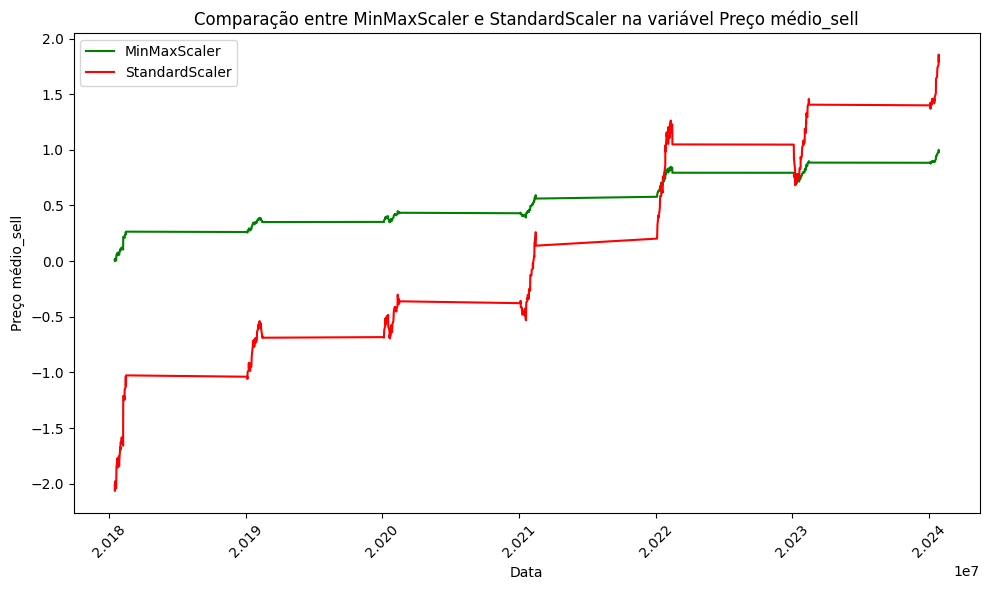

In [3]:
# Aplicar StandardScaler a X_train e X_test
scaler_standard = StandardScaler()
X_train_standard_scaled = scaler_standard.fit_transform(X_train)
X_test_standard_scaled = scaler_standard.transform(X_test)

# Aplicar MinMaxScaler a X_train e X_test
scaler_min_max = MinMaxScaler()
X_train_min_max_scaled = scaler_min_max.fit_transform(X_train)
X_test_min_max_scaled = scaler_min_max.transform(X_test)

# Aplicar MinMaxScaler ao y para visualizar as diferenças
y_min_max_scaled = scaler_min_max.fit_transform(y)
y_standard_scaled = scaler_standard.fit_transform(y)

# Plotar os resultados de y com MinMaxScaler e StandardScaler
plt.figure(figsize=(10, 6))

# Gráfico dos valores originais de y
# plt.plot(df['Date'], y, label='Original', color='blue')

# Gráfico de y com MinMaxScaler
plt.plot(df['Date'], y_min_max_scaled, label='MinMaxScaler', color='green')

# Gráfico de y com StandardScaler
plt.plot(df['Date'], y_standard_scaled, label='StandardScaler', color='red')

# Configurações do gráfico
plt.title('Comparação entre MinMaxScaler e StandardScaler na variável Preço médio_sell')
plt.xlabel('Data')
plt.ylabel('Preço médio_sell')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar o gráfico
plt.show()